# Analyzing the trends of COVID-19 with Python

Problem Statement: 

Given data about COVID 19 patients, write code to visualize the impact and analyze the trend of rate of 
infection and recovery as well as make predictions about the number of cases expected a week in future 
based on the current trends

In [12]:
# Study and analyze various trends of Covid19
# FB Prophet library --> We don't have to worry about stationarity or seasonality

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("covid_19_clean_complete.csv")

In [4]:
df

Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1                NaN                Albania  41.153300  20.168300  2020-01-22   
2                NaN                Algeria  28.033900   1.659600  2020-01-22   
3                NaN                Andorra  42.506300   1.521800  2020-01-22   
4                NaN                 Angola -11.202700  17.873900  2020-01-22   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [5]:
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [6]:
df.tail()

Province/State         Country/Region        Lat       Long        Date  \
49063            NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064            NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065            NaN                Comoros -11.645500  43.333300  2020-07-27   
49066            NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067            NaN                Lesotho -29.610000  28.233600  2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa

In [7]:
#Renaming the columns
df.rename(columns={"Date":"date",
                   "Province/State":"state",
                   "Country/Region":"country",
                   "Lat":"lat","Long":"long",
                   "Confirmed":"confirmed",
                   "Deaths":"deaths",
                   "Recovered":"recovered"
                   },inplace = True)

# df = df.rename(columns={"Date":"date",
#                    "Province/State":"state",
#                    "Country/Region":"country",
#                    "Lat":"lat","Long":"long",
#                    "Confirmed":"confirmed",
#                    "Deaths":"deaths",
#                    "Recovered":"recovered"
#                    })

In [8]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  
0              0       0          0       0  Eastern Mediterranean  
1              0       0          0       0                 Europe  
2              0       0          0       0                 Africa  
3              0       0          0       0                 Europe  
4              0       0          0       0                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[49068 rows x 10 columns]

In [9]:
df["active"] = df["confirmed"] - df["deaths"] - df["recovered"]

In [10]:
df

state                country        lat       long        date  \
0       NaN            Afghanistan  33.939110  67.709953  2020-01-22   
1       NaN                Albania  41.153300  20.168300  2020-01-22   
2       NaN                Algeria  28.033900   1.659600  2020-01-22   
3       NaN                Andorra  42.506300   1.521800  2020-01-22   
4       NaN                 Angola -11.202700  17.873900  2020-01-22   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  active  
0              0       0          0       0  Eastern Mediterranean       0  
1              0       0          0       0                 Europe       0  
2              0       0          0       0                 Africa       0  
3              0       0          0       0                 Europe       0  
4              0       0          0       0                 Africa       0  
...          ...     ...        ...     ...                    ...     ...  
49063        865      14        734     117                 Africa     117  
49064       1691     483        833     375  Eastern Mediterranean     375  
49065        354       7        328      19                 Africa      19  
49066       7235      60       6028    1147                 Europe    1147  
49067        505      12        128     365                 Africa     365  

[49068 rows x 11 columns]

In [11]:
#countries having most active cases
top = df[df["date"]== df["date"].max()]
world = top.groupby("country")["confirmed","active","deaths"].sum().reset_index()
world.head()

country  confirmed  active  deaths
0  Afghanistan      36263    9796    1269
1      Albania       4880    1991     144
2      Algeria      27973    7973    1163
3      Andorra        907      52      52
4       Angola        950     667      41

In [12]:
world['active'].max()

2816444

In [13]:
figure = px.choropleth(world,locations="country",
                       locationmode = "country names", color="active",
                       hover_name="country",range_color=[1,100000],
                       color_continuous_scale="reds",
                       title="Countries with Active Cases")
figure.show()

# world: The dataset used as the source for the choropleth map.

# locations="country": Specifies the column in the dataset that contains the country names or identifiers.

# locationmode="country names": Sets the mode for interpreting the location values as country names.

# color="active": Determines the column in the dataset that provides the data values to be visualized as colors on the map.

# hover_name="country": Specifies the column in the dataset that contains the labels to be displayed when hovering over each map area.

# range_color=[1,100000]: Defines the range of values to be mapped to the color scale. In this case, it ranges from 1 to 100,000.

# color_continuous_scale="reds": Sets the color scale to be used for the choropleth map. In this example, the "reds" color scale is applied.

# title="Countries with Active Cases": Sets the title of the choropleth map.

# figure.show(): Displays the choropleth map using the specified configurations.

[Text(0.5, 0, 'Dates'), Text(0, 0.5, 'Total cases')]

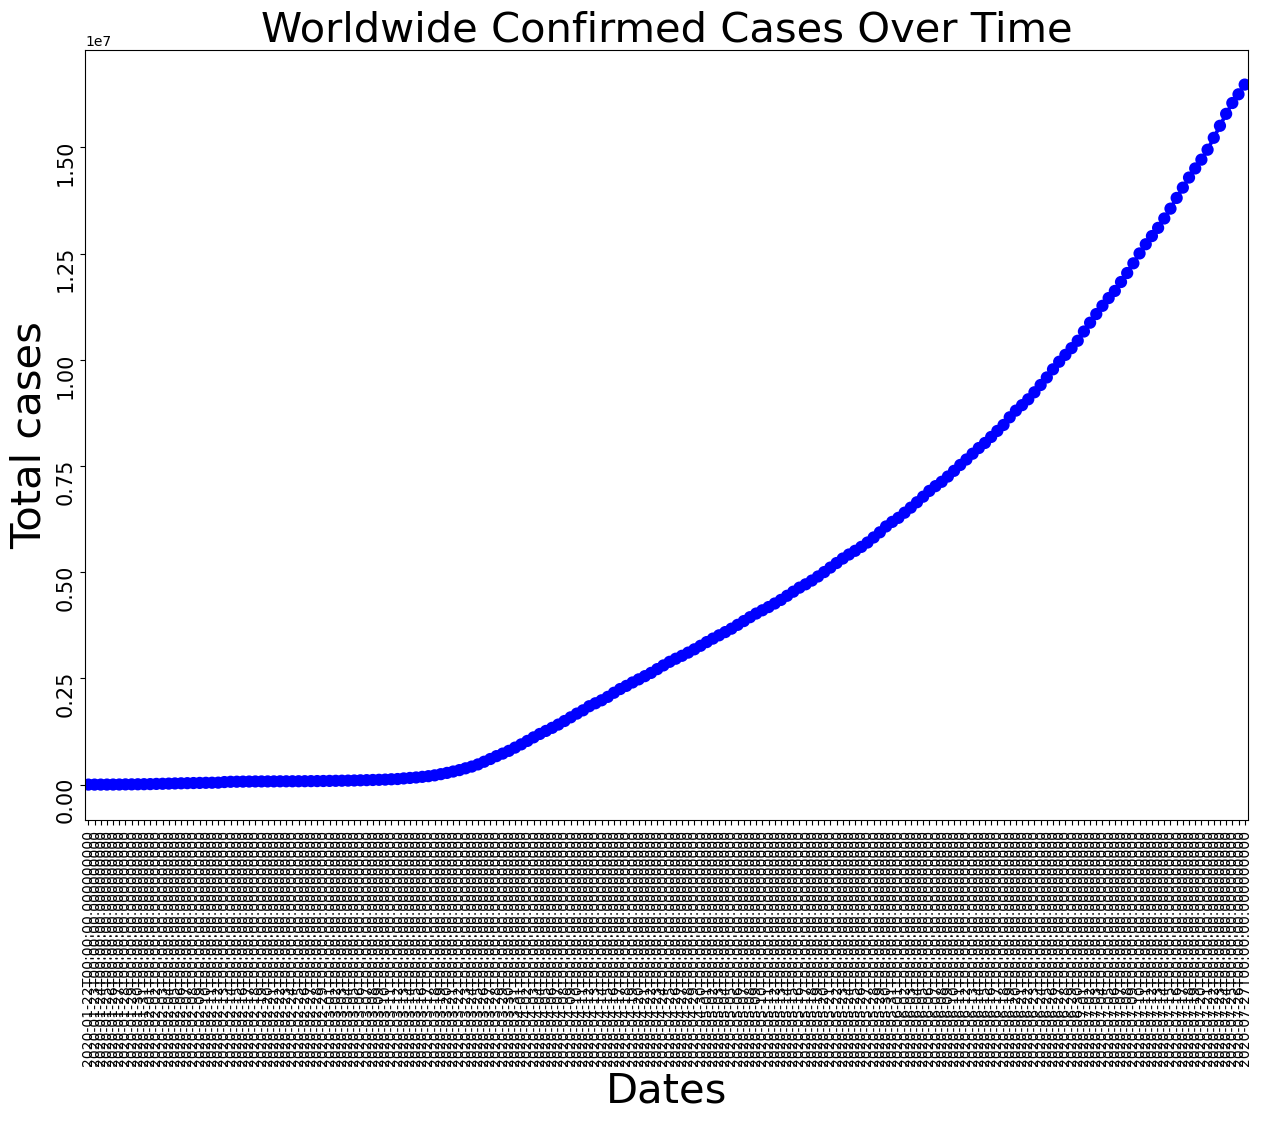

In [16]:
# TREND OF HOW COVID SPREAD
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates",fontsize=30)
plt.ylabel("Total cases",fontsize=30)
plt.yticks(rotation = 90)
plt.title("Worldwide Confirmed Cases Over Time",fontsize=30)
total_cases = df.groupby("date")['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date, y=total_cases.confirmed, color='b')
ax.set(xlabel="Dates",ylabel="Total cases")

In [15]:
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  active  
48807      36263    1269      25198    9796  Eastern Mediterranean    9796  
48808       4880     144       2745    1991                 Europe    1991  
48809      27973    1163      18837    7973                 Africa    7973  
48810        907      52        803      52                 Europe      52  
48811        950      41        242     667                 Africa     667  
...          ...     ...        ...     ...                    ...     ...  
49063        865      14        734     117                 Africa     117  
49064       1691     483        833     375  Eastern Mediterranean     375  
49065        354       7        328      19                 Africa      19  
49066       7235      60       6028    1147                 Europe    1147  
49067        505      12        128     365                 Africa     365  

[261 rows x 11 columns]

In [20]:
top_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()
top_actives

country   active
0               US  2816444
1           Brazil   508116
2            India   495499
3   United Kingdom   254427
4           Russia   201097
5     South Africa   170537
6         Colombia   117163
7           France   108928
8           Canada   107514
9             Peru    98752
10      Bangladesh    97577
11           Spain    93613
12       Argentina    91782
13          Sweden    73695
14     Philippines    53649
15           Egypt    52992
16          Mexico    47657
17     Netherlands    47064
18         Bolivia    47056
19    Saudi Arabia    43238

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

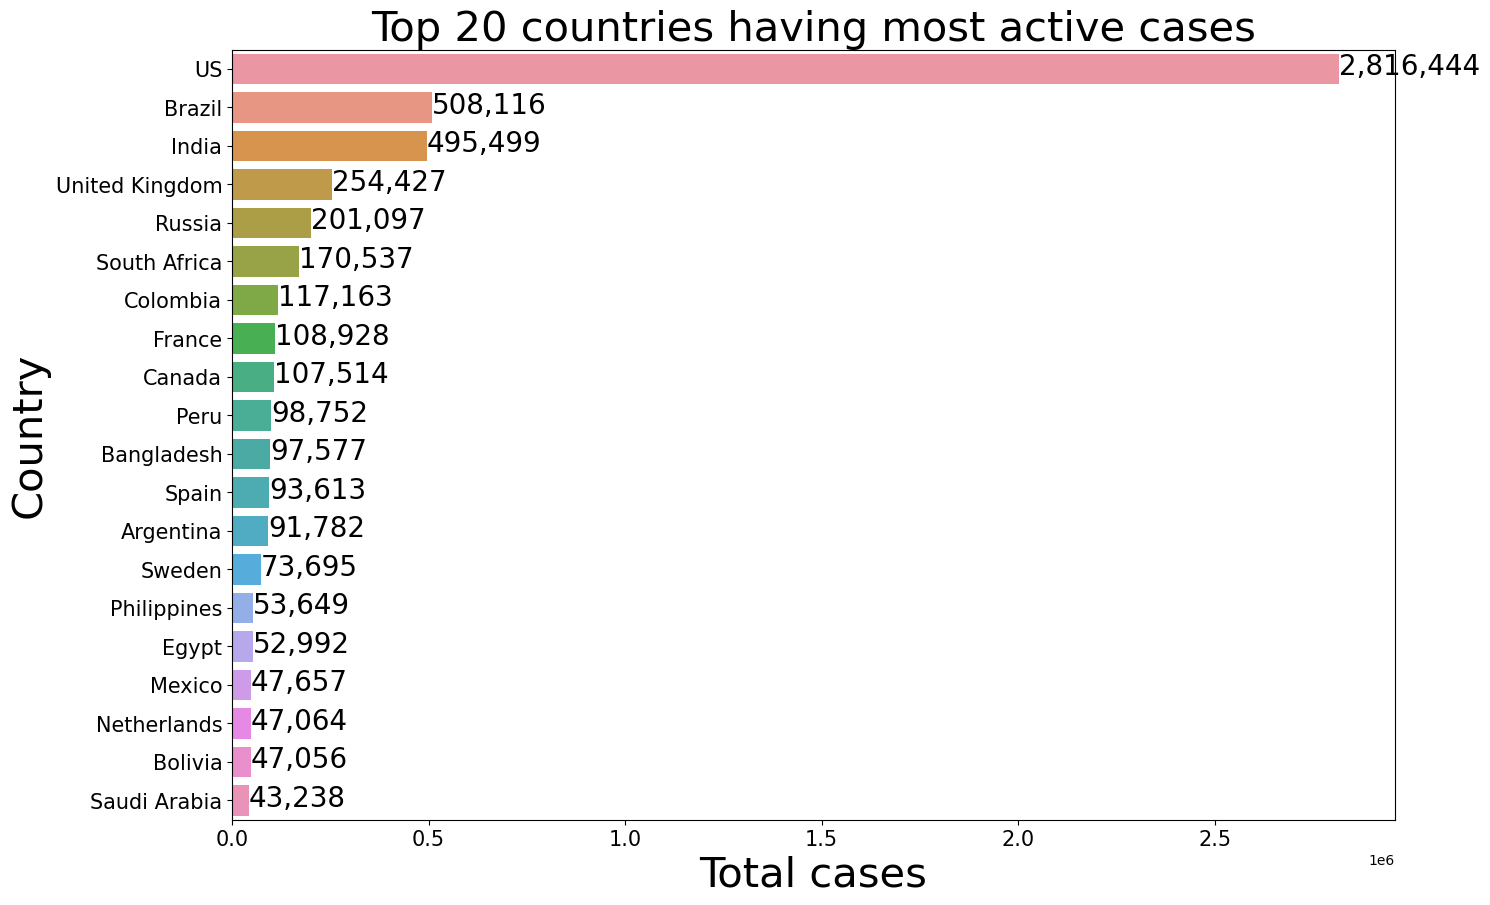

In [21]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most active cases",fontsize=30)

ax = sns.barplot(x=top_actives.active, y=top_actives.country)
for i, (value,name) in enumerate(zip(top_actives.active,top_actives.country)):
    ax.text(value, i-.05,f'{value:,.0f}',size=20,ha="left",va="center")
ax.set(xlabel="Total cases",ylabel="Country")

In [22]:
# TOP DEATH RATES
top_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()

In [23]:
top_deaths

country  deaths
0               US  148011
1           Brazil   87618
2   United Kingdom   45844
3           Mexico   44022
4            Italy   35112
5            India   33408
6           France   30212
7            Spain   28432
8             Peru   18418
9             Iran   15912
10          Russia   13334
11         Belgium    9822
12           Chile    9187
13         Germany    9125
14          Canada    8944
15        Colombia    8777
16    South Africa    7067
17     Netherlands    6160
18        Pakistan    5842
19          Sweden    5700

In [24]:
top

state                country        lat       long        date  \
48807   NaN            Afghanistan  33.939110  67.709953  2020-07-27   
48808   NaN                Albania  41.153300  20.168300  2020-07-27   
48809   NaN                Algeria  28.033900   1.659600  2020-07-27   
48810   NaN                Andorra  42.506300   1.521800  2020-07-27   
48811   NaN                 Angola -11.202700  17.873900  2020-07-27   
...     ...                    ...        ...        ...         ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100  2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388  2020-07-27   
49065   NaN                Comoros -11.645500  43.333300  2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100  2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600  2020-07-27   

       confirmed  deaths  recovered  Active             WHO Region  active  
48807      36263    1269      25198    9796  Eastern Mediterranean    9796  
48808       4880     144       2745    1991                 Europe    1991  
48809      27973    1163      18837    7973                 Africa    7973  
48810        907      52        803      52                 Europe      52  
48811        950      41        242     667                 Africa     667  
...          ...     ...        ...     ...                    ...     ...  
49063        865      14        734     117                 Africa     117  
49064       1691     483        833     375  Eastern Mediterranean     375  
49065        354       7        328      19                 Africa      19  
49066       7235      60       6028    1147                 Europe    1147  
49067        505      12        128     365                 Africa     365  

[261 rows x 11 columns]

In [25]:
top[(top["date"]=="2020-07-27") & (top["country"]=="Afghanistan")]

state      country       lat       long        date  confirmed  deaths  \
48807   NaN  Afghanistan  33.93911  67.709953  2020-07-27      36263    1269   

       recovered  Active             WHO Region  active  
48807      25198    9796  Eastern Mediterranean    9796

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

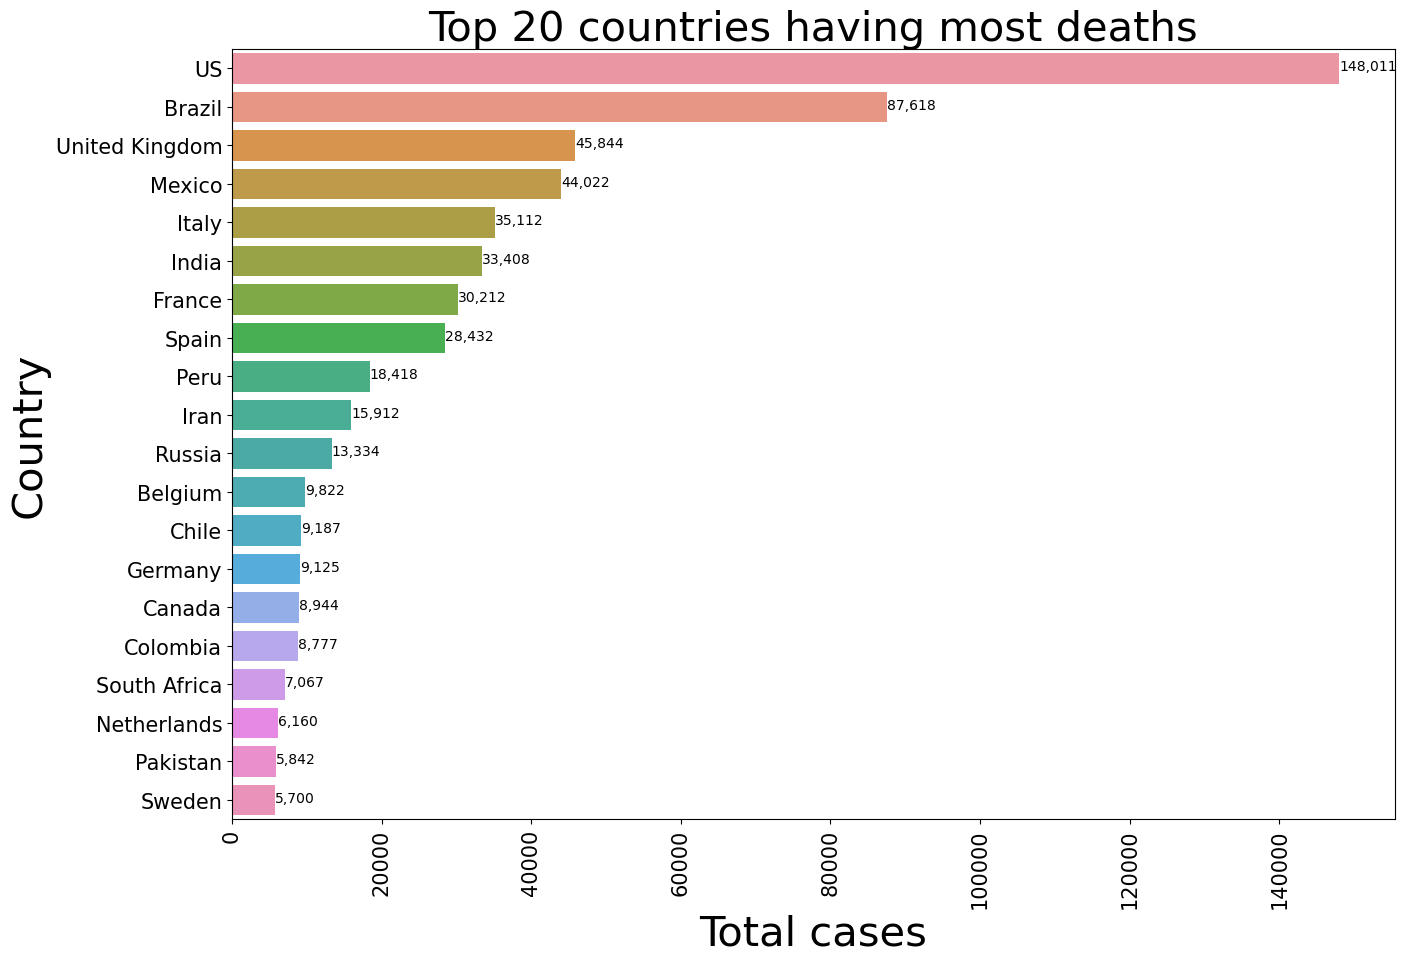

In [31]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)
plt.title("Top 20 countries having most deaths",fontsize=30)

ax = sns.barplot(x=top_deaths.deaths, y=top_deaths.country)

for i, (value,name) in enumerate(zip(top_deaths.deaths,top_deaths.country)):
    ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")

ax.set(xlabel="Total cases",ylabel="Country")

In [32]:
# NUMBER OF PEOPLE RECOVERED
recovery = top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()
recovery

country  recovered
0         Brazil    1846641
1             US    1325804
2          India     951166
3         Russia     602249
4          Chile     319954
5         Mexico     303810
6   South Africa     274925
7           Peru     272547
8           Iran     255144
9       Pakistan     241026
10  Saudi Arabia     222936
11        Turkey     210469
12         Italy     198593
13       Germany     190314
14         Spain     150376
15      Colombia     131161
16    Bangladesh     125683
17         Qatar     106328
18        France      81212
19         China      78869

[Text(0.5, 0, 'Total cases'), Text(0, 0.5, 'Country')]

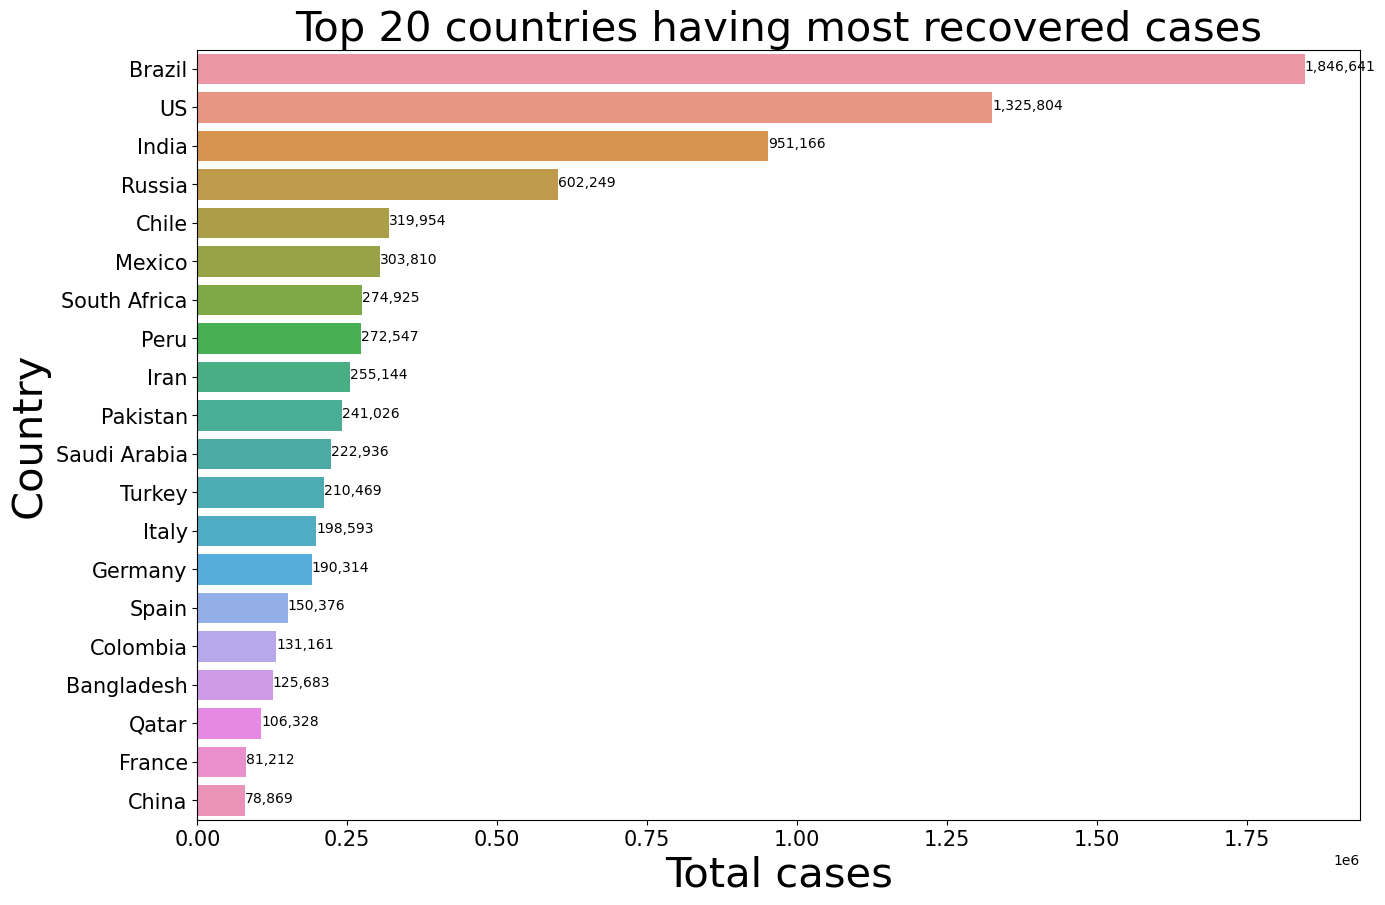

In [33]:
plt.figure(figsize=(15,10))

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel("Total cases",fontsize=30)
plt.ylabel("Country",fontsize=30)

plt.title("Top 20 countries having most recovered cases",fontsize=30)

ax = sns.barplot(x=recovery.recovered, y=recovery.country)

for i, (value,name) in enumerate(zip(recovery.recovered,recovery.country)):
    ax.text(value, i-.05,f'{value:,.0f}',size=10,ha="left",va="center")

ax.set(xlabel="Total cases",ylabel="Country")

In [34]:
brazil = df[df.country == "Brazil"]
brazil = brazil.groupby(by = "date")["recovered","deaths","confirmed","active"].sum().reset_index()
brazil

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
..          ...        ...     ...        ...     ...
183  2020-07-23    1620313   84082    2287475  583080
184  2020-07-24    1693214   85238    2343366  564914
185  2020-07-25    1785359   86449    2394513  522705
186  2020-07-26    1812913   87004    2419091  519174
187  2020-07-27    1846641   87618    2442375  508116

[188 rows x 5 columns]

In [35]:
brazil.sort_values(by='date', ascending = False)

date  recovered  deaths  confirmed  active
187  2020-07-27    1846641   87618    2442375  508116
186  2020-07-26    1812913   87004    2419091  519174
185  2020-07-25    1785359   86449    2394513  522705
184  2020-07-24    1693214   85238    2343366  564914
183  2020-07-23    1620313   84082    2287475  583080
..          ...        ...     ...        ...     ...
4    2020-01-26          0       0          0       0
3    2020-01-25          0       0          0       0
2    2020-01-24          0       0          0       0
1    2020-01-23          0       0          0       0
0    2020-01-22          0       0          0       0

[188 rows x 5 columns]

In [36]:
pd.set_option('display.max_rows', None)

In [37]:
brazil

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
5    2020-01-27          0       0          0       0
6    2020-01-28          0       0          0       0
7    2020-01-29          0       0          0       0
8    2020-01-30          0       0          0       0
9    2020-01-31          0       0          0       0
10   2020-02-01          0       0          0       0
11   2020-02-02          0       0          0       0
12   2020-02-03          0       0          0       0
13   2020-02-04          0       0          0       0
14   2020-02-05          0       0          0       0
15   2020-02-06          0       0          0       0
16   2020-02-07          0       0          0       0
17   2020-02-08          0       0          0       0
18   2020-02-09          0       0          0       0
19   2020-02-10          0       0          0       0
20   2020-02-11          0       0          0       0
21   2020-02-12          0       0          0       0
22   2020-02-13          0       0          0       0
23   2020-02-14          0       0          0       0
24   2020-02-15          0       0          0       0
25   2020-02-16          0       0          0       0
26   2020-02-17          0       0          0       0
27   2020-02-18          0       0          0       0
28   2020-02-19          0       0          0       0
29   2020-02-20          0       0          0       0
30   2020-02-21          0       0          0       0
31   2020-02-22          0       0          0       0
32   2020-02-23          0       0          0       0
33   2020-02-24          0       0          0       0
34   2020-02-25          0       0          0       0
35   2020-02-26          0       0          1       1
36   2020-02-27          0       0          1       1
37   2020-02-28          0       0          1       1
38   2020-02-29          0       0          2       2
39   2020-03-01          0       0          2       2
40   2020-03-02          0       0          2       2
41   2020-03-03          0       0          2       2
42   2020-03-04          0       0          4       4
43   2020-03-05          0       0          4       4
44   2020-03-06          0       0         13      13
45   2020-03-07          0       0         13      13
46   2020-03-08          0       0         20      20
47   2020-03-09          0       0         25      25
48   2020-03-10          0       0         31      31
49   2020-03-11          0       0         38      38
50   2020-03-12          0       0         52      52
51   2020-03-13          0       0        151     151
52   2020-03-14          0       0        151     151
53   2020-03-15          0       0        162     162
54   2020-03-16          1       0        200     199
55   2020-03-17          2       1        321     318
56   2020-03-18          2       3        372     367
57   2020-03-19          2       6        621     613
58   2020-03-20          2      11        793     780
59   2020-03-21          2      15       1021    1004
60   2020-03-22          2      25       1546    1519
61   2020-03-23          2      34       1924    1888
62   2020-03-24          2      46       2247    2199
63   2020-03-25          2      59       2554    2493
64   2020-03-26          6      77       2985    2902
65   2020-03-27          6      92       3417    3319
66   2020-03-28          6     111       3904    3787
67   2020-03-29          6     136       4256    4114
68   2020-03-30        120     159       4579    4300
69   2020-03-31        127     201       5717    5389
70   2020-04-01        127     240       6836    6469
71   2020-04-02        127     324       8044    7593
72   2020-04-03        127     359       9056    8570
73   2020-04-04

In [38]:
us = df[df.country == "US"]
us = us.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()
us

date  recovered  deaths  confirmed   active
0    2020-01-22          0       0          1        1
1    2020-01-23          0       0          1        1
2    2020-01-24          0       0          2        2
3    2020-01-25          0       0          2        2
4    2020-01-26          0       0          5        5
5    2020-01-27          0       0          5        5
6    2020-01-28          0       0          5        5
7    2020-01-29          0       0          5        5
8    2020-01-30          0       0          5        5
9    2020-01-31          0       0          7        7
10   2020-02-01          0       0          8        8
11   2020-02-02          0       0          8        8
12   2020-02-03          0       0         11       11
13   2020-02-04          0       0         11       11
14   2020-02-05          0       0         11       11
15   2020-02-06          0       0         11       11
16   2020-02-07          0       0         11       11
17   2020-02-08          0       0         11       11
18   2020-02-09          3       0         11        8
19   2020-02-10          3       0         11        8
20   2020-02-11          3       0         12        9
21   2020-02-12          3       0         12        9
22   2020-02-13          3       0         13       10
23   2020-02-14          3       0         13       10
24   2020-02-15          3       0         13       10
25   2020-02-16          3       0         13       10
26   2020-02-17          3       0         13       10
27   2020-02-18          3       0         13       10
28   2020-02-19          3       0         13       10
29   2020-02-20          3       0         13       10
30   2020-02-21          5       0         15       10
31   2020-02-22          5       0         15       10
32   2020-02-23          5       0         15       10
33   2020-02-24          5       0         15       10
34   2020-02-25          6       0         15        9
35   2020-02-26          6       0         15        9
36   2020-02-27          6       0         16       10
37   2020-02-28          7       0         16        9
38   2020-02-29          7       1         24       16
39   2020-03-01          7       1         30       22
40   2020-03-02          7       6         53       40
41   2020-03-03          7       7         73       59
42   2020-03-04          7      11        104       86
43   2020-03-05          7      12        174      155
44   2020-03-06          7      14        222      201
45   2020-03-07          7      17        337      313
46   2020-03-08          7      21        451      423
47   2020-03-09          7      22        519      490
48   2020-03-10          8      28        711      675
49   2020-03-11          8      33       1109     1068
50   2020-03-12         12      43       1561     1506
51   2020-03-13         12      52       2157     2093
52   2020-03-14         12      58       2870     2800
53   2020-03-15         12      70       2968     2886
54   2020-03-16         17      97       4360     4246
55   2020-03-17         17     131       6141     5993
56   2020-03-18        105     188       8917     8624
57   2020-03-19        121     265      14157    13771
58   2020-03-20        147     362      19479    18970
59   2020-03-21        176     456      25825    25193
60   2020-03-22        178     601      33761    32982
61   2020-03-23        178     784      43850    42888
62   2020-03-24        348    1021      54112    52743
63   2020-03-25        361    1333      66055    64361
64   2020-03-26        681    1746      84091    81664
65   2020-03-27        869    2300     102276    99107
66   2020-03-28       1072    2934     122069   118063
67   2020-03-29       2665    3561     141205   134979
68   2020-03-30       5644    4381     162707   152682
69   2020-03-31       7024    5605     188724   176095
70   2020-04-01       8474    6846     214205   198885
71   2020-04-02       9001    8432     244610   227

In [39]:
uk = df[df.country == "United Kingdom"]
uk = uk.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()

uk

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
5    2020-01-27          0       0          0       0
6    2020-01-28          0       0          0       0
7    2020-01-29          0       0          0       0
8    2020-01-30          0       0          0       0
9    2020-01-31          0       0          2       2
10   2020-02-01          0       0          2       2
11   2020-02-02          0       0          2       2
12   2020-02-03          0       0          8       8
13   2020-02-04          0       0          8       8
14   2020-02-05          0       0          9       9
15   2020-02-06          0       0          9       9
16   2020-02-07          0       0          9       9
17   2020-02-08          0       0         13      13
18   2020-02-09          0       0         14      14
19   2020-02-10          0       0         14      14
20   2020-02-11          0       0         15      15
21   2020-02-12          1       0         16      15
22   2020-02-13          1       0         17      16
23   2020-02-14          1       0         18      17
24   2020-02-15          1       0         18      17
25   2020-02-16          8       0         18      10
26   2020-02-17          8       0         19      11
27   2020-02-18          8       0         19      11
28   2020-02-19          8       0         20      12
29   2020-02-20          8       0         22      14
30   2020-02-21          8       0         23      15
31   2020-02-22          8       0         23      15
32   2020-02-23          8       0         28      20
33   2020-02-24          8       0         30      22
34   2020-02-25          8       0         34      26
35   2020-02-26          8       0         37      29
36   2020-02-27          8       0         44      36
37   2020-02-28          8       0         56      48
38   2020-02-29          8       0         61      53
39   2020-03-01          8       0         94      86
40   2020-03-02          8       0        134     126
41   2020-03-03          8       0        189     181
42   2020-03-04          8       0        246     238
43   2020-03-05          8       0        295     287
44   2020-03-06          8       1        374     365
45   2020-03-07         18       2        429     409
46   2020-03-08         18       2        483     463
47   2020-03-09         18       3        630     609
48   2020-03-10         19       7        889     863
49   2020-03-11         19       7       1301    1275
50   2020-03-12         19       9       1790    1762
51   2020-03-13         19      10       2270    2241
52   2020-03-14         19      28       2634    2587
53   2020-03-15         19      43       3077    3015
54   2020-03-16         21      66       3692    3605
55   2020-03-17         53      82       4462    4327
56   2020-03-18         67     116       5467    5284
57   2020-03-19         67     159       6533    6307
58   2020-03-20         67     195       7791    7529
59   2020-03-21         67     251       9006    8688
60   2020-03-22         67     286      10395   10042
61   2020-03-23         67     360      12744   12317
62   2020-03-24        140     509      15126   14477
63   2020-03-25        140     696      17843   17007
64   2020-03-26        150     880      20970   19940
65   2020-03-27        151    1164      24219   22904
66   2020-03-28        151    1458      27062   25453
67   2020-03-29        151    1673      29954   28130
68   2020-03-30        171    2047      34281   32063
69   2020-03-31        179    2430      38815   36206
70   2020-04-01        179    3101      43789   40509
71   2020-04-02        192    3753      48718   44773
72   2020-04-03        208    4468      53699   49023
73   2020-04-04

In [40]:
india = df[df.country == "India"]
india= india.groupby(by ="date")["recovered","deaths","confirmed","active"].sum().reset_index()

india

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
5    2020-01-27          0       0          0       0
6    2020-01-28          0       0          0       0
7    2020-01-29          0       0          0       0
8    2020-01-30          0       0          1       1
9    2020-01-31          0       0          1       1
10   2020-02-01          0       0          1       1
11   2020-02-02          0       0          2       2
12   2020-02-03          0       0          3       3
13   2020-02-04          0       0          3       3
14   2020-02-05          0       0          3       3
15   2020-02-06          0       0          3       3
16   2020-02-07          0       0          3       3
17   2020-02-08          0       0          3       3
18   2020-02-09          0       0          3       3
19   2020-02-10          0       0          3       3
20   2020-02-11          0       0          3       3
21   2020-02-12          0       0          3       3
22   2020-02-13          0       0          3       3
23   2020-02-14          0       0          3       3
24   2020-02-15          0       0          3       3
25   2020-02-16          3       0          3       0
26   2020-02-17          3       0          3       0
27   2020-02-18          3       0          3       0
28   2020-02-19          3       0          3       0
29   2020-02-20          3       0          3       0
30   2020-02-21          3       0          3       0
31   2020-02-22          3       0          3       0
32   2020-02-23          3       0          3       0
33   2020-02-24          3       0          3       0
34   2020-02-25          3       0          3       0
35   2020-02-26          3       0          3       0
36   2020-02-27          3       0          3       0
37   2020-02-28          3       0          3       0
38   2020-02-29          3       0          3       0
39   2020-03-01          3       0          3       0
40   2020-03-02          3       0          5       2
41   2020-03-03          3       0          5       2
42   2020-03-04          3       0         28      25
43   2020-03-05          3       0         30      27
44   2020-03-06          3       0         31      28
45   2020-03-07          3       0         34      31
46   2020-03-08          3       0         39      36
47   2020-03-09          3       0         43      40
48   2020-03-10          4       0         56      52
49   2020-03-11          4       1         62      57
50   2020-03-12          4       1         73      68
51   2020-03-13          4       2         82      76
52   2020-03-14          4       2        102      96
53   2020-03-15         13       2        113      98
54   2020-03-16         13       2        119     104
55   2020-03-17         14       3        142     125
56   2020-03-18         14       3        156     139
57   2020-03-19         15       4        194     175
58   2020-03-20         20       5        244     219
59   2020-03-21         23       4        330     303
60   2020-03-22         27       7        396     362
61   2020-03-23         27      10        499     462
62   2020-03-24         40      10        536     486
63   2020-03-25         43      12        657     602
64   2020-03-26         45      20        727     662
65   2020-03-27         73      20        887     794
66   2020-03-28         84      24        987     879
67   2020-03-29         95      27       1024     902
68   2020-03-30        102      32       1251    1117
69   2020-03-31        123      35       1397    1239
70   2020-04-01        148      58       1998    1792
71   2020-04-02        191      72       2543    2280
72   2020-04-03        192      72       2567    2303
73   2020-04-04

In [41]:
Russia=df[df.country=='Russia']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()

Russia

date  recovered  deaths  confirmed  active
0    2020-01-22          0       0          0       0
1    2020-01-23          0       0          0       0
2    2020-01-24          0       0          0       0
3    2020-01-25          0       0          0       0
4    2020-01-26          0       0          0       0
5    2020-01-27          0       0          0       0
6    2020-01-28          0       0          0       0
7    2020-01-29          0       0          0       0
8    2020-01-30          0       0          0       0
9    2020-01-31          0       0          2       2
10   2020-02-01          0       0          2       2
11   2020-02-02          0       0          2       2
12   2020-02-03          0       0          2       2
13   2020-02-04          0       0          2       2
14   2020-02-05          0       0          2       2
15   2020-02-06          0       0          2       2
16   2020-02-07          0       0          2       2
17   2020-02-08          0       0          2       2
18   2020-02-09          0       0          2       2
19   2020-02-10          0       0          2       2
20   2020-02-11          0       0          2       2
21   2020-02-12          2       0          2       0
22   2020-02-13          2       0          2       0
23   2020-02-14          2       0          2       0
24   2020-02-15          2       0          2       0
25   2020-02-16          2       0          2       0
26   2020-02-17          2       0          2       0
27   2020-02-18          2       0          2       0
28   2020-02-19          2       0          2       0
29   2020-02-20          2       0          2       0
30   2020-02-21          2       0          2       0
31   2020-02-22          2       0          2       0
32   2020-02-23          2       0          2       0
33   2020-02-24          2       0          2       0
34   2020-02-25          2       0          2       0
35   2020-02-26          2       0          2       0
36   2020-02-27          2       0          2       0
37   2020-02-28          2       0          2       0
38   2020-02-29          2       0          2       0
39   2020-03-01          2       0          2       0
40   2020-03-02          2       0          3       1
41   2020-03-03          2       0          3       1
42   2020-03-04          2       0          3       1
43   2020-03-05          2       0          4       2
44   2020-03-06          2       0         13      11
45   2020-03-07          2       0         13      11
46   2020-03-08          3       0         17      14
47   2020-03-09          3       0         17      14
48   2020-03-10          3       0         20      17
49   2020-03-11          3       0         20      17
50   2020-03-12          3       0         28      25
51   2020-03-13          3       0         45      42
52   2020-03-14          8       0         59      51
53   2020-03-15          8       0         63      55
54   2020-03-16          8       0         90      82
55   2020-03-17          8       0        114     106
56   2020-03-18          8       0        147     139
57   2020-03-19          9       1        199     189
58   2020-03-20          9       1        253     243
59   2020-03-21         12       1        306     293
60   2020-03-22         16       1        367     350
61   2020-03-23         16       1        438     421
62   2020-03-24         22       1        495     472
63   2020-03-25         29       3        658     626
64   2020-03-26         38       3        840     799
65   2020-03-27         45       4       1036     987
66   2020-03-28         49       4       1264    1211
67   2020-03-29         64       8       1534    1462
68   2020-03-30         66       9       1836    1761
69   2020-03-31        121      17       2337    2199
70   2020-04-01        190      24       2777    2563
71   2020-04-02        235      30       3548    3283
72   2020-04-03        281      34       4149    3834
73   2020-04-04

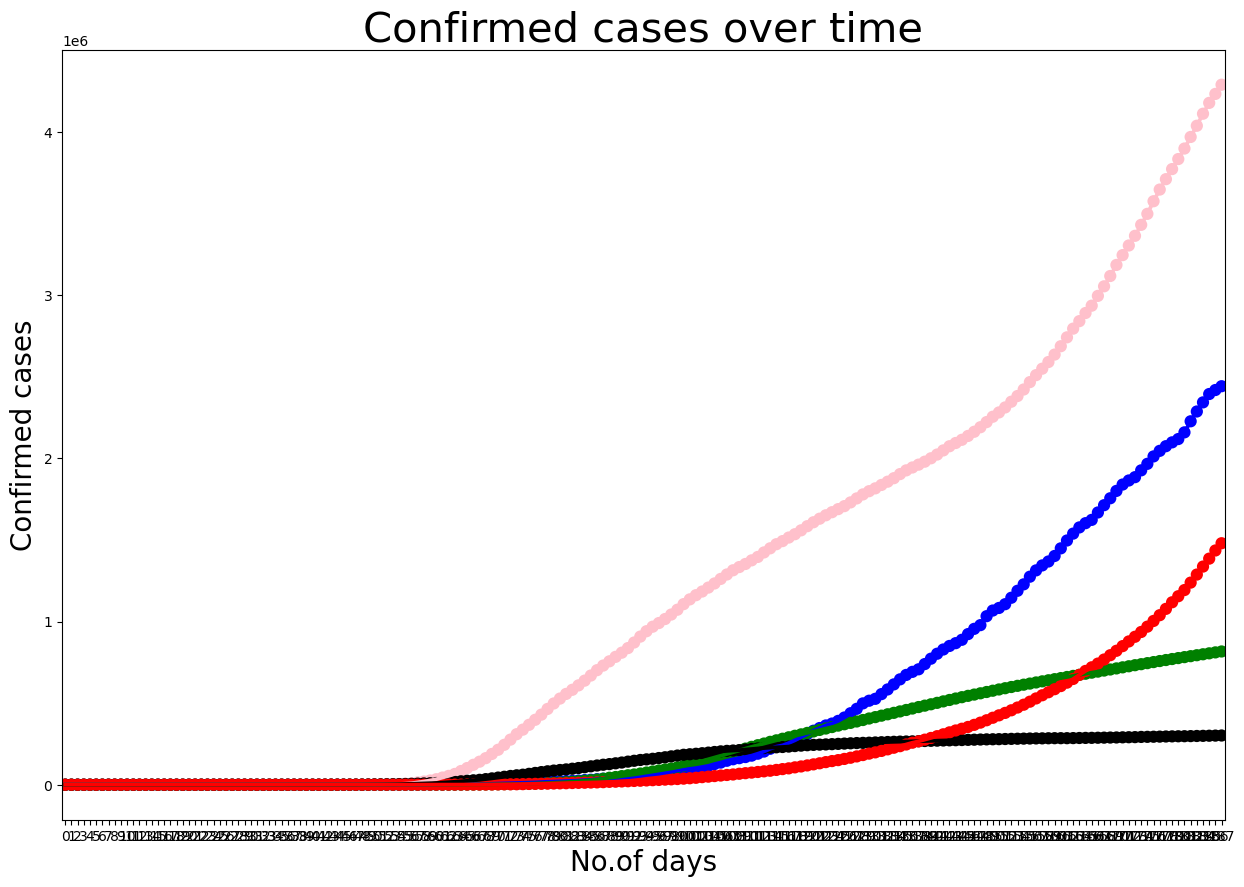

In [46]:
plt.figure(figsize=(15,10))

sns.pointplot(brazil.index,brazil.confirmed,color="Blue")
sns.pointplot(us.index,us.confirmed,color="Pink")
sns.pointplot(Russia.index,Russia.confirmed,color="Green")
sns.pointplot(uk.index,uk.confirmed,color="Black")
sns.pointplot(india.index,india.confirmed,color="Red")

plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

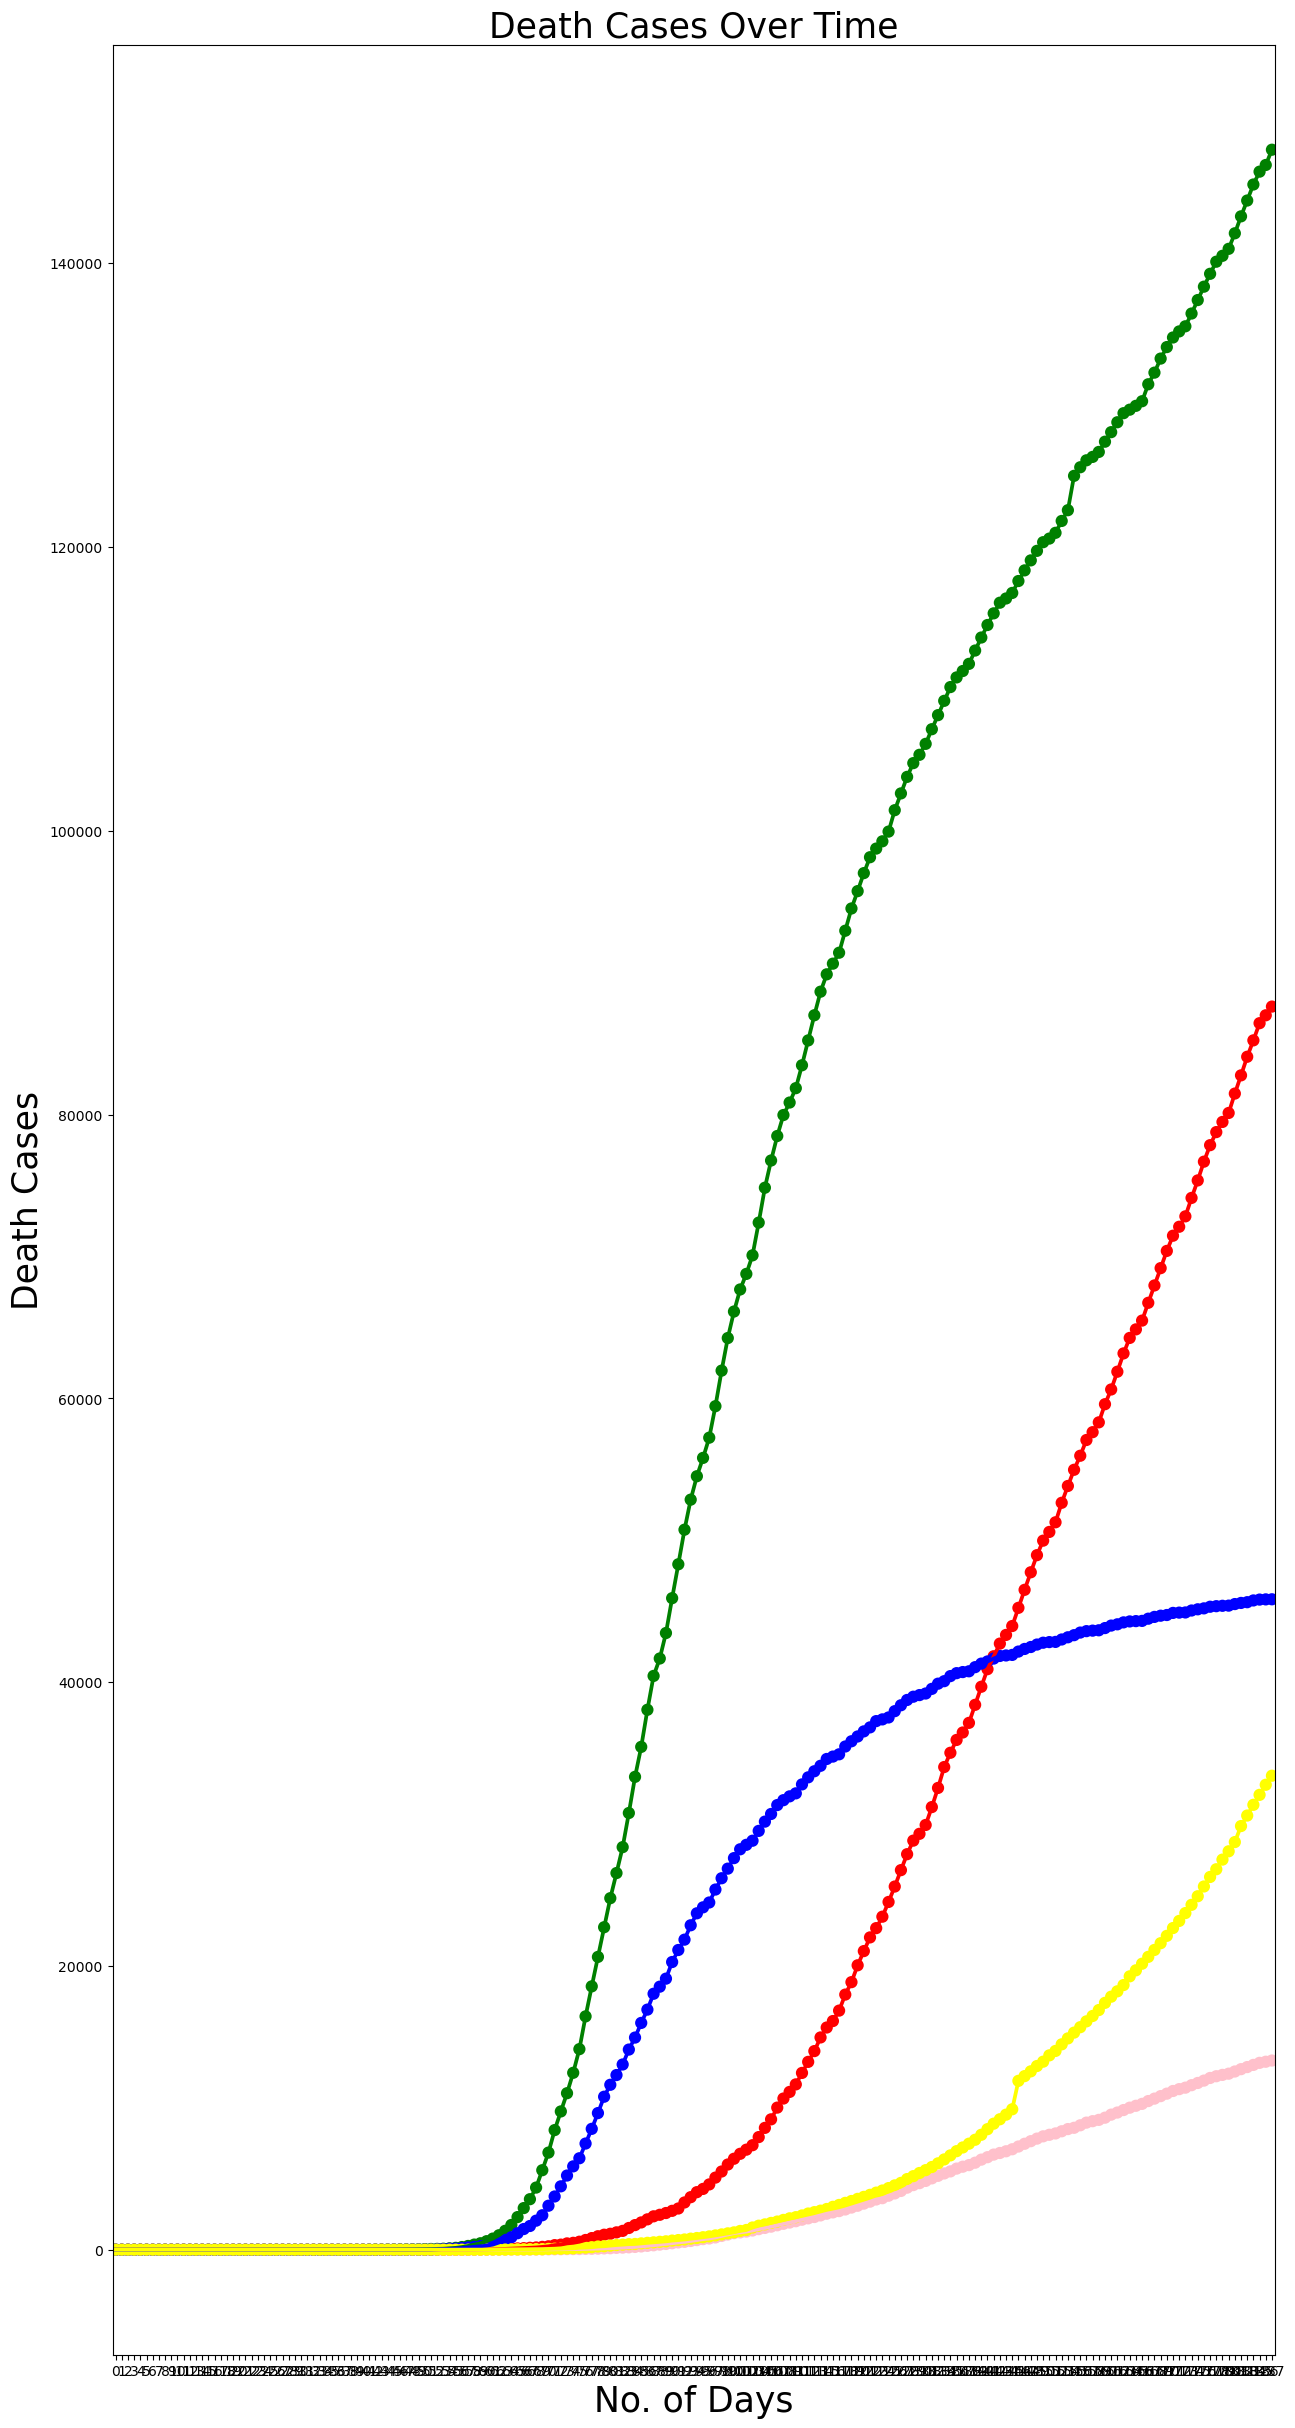

In [47]:
plt.figure(figsize=(15,30))
sns.pointplot(brazil.index,brazil.deaths,color="Red")
sns.pointplot(us.index,us.deaths,color="Green")
sns.pointplot(Russia.index,Russia.deaths,color="Pink")
sns.pointplot(uk.index,uk.deaths,color="Blue")
sns.pointplot(india.index,india.deaths,color="Yellow")

plt.title("Death Cases Over Time", fontsize=25)
plt.ylabel("Death Cases",fontsize=25)
plt.xlabel("No. of Days",fontsize=25)
plt.show()

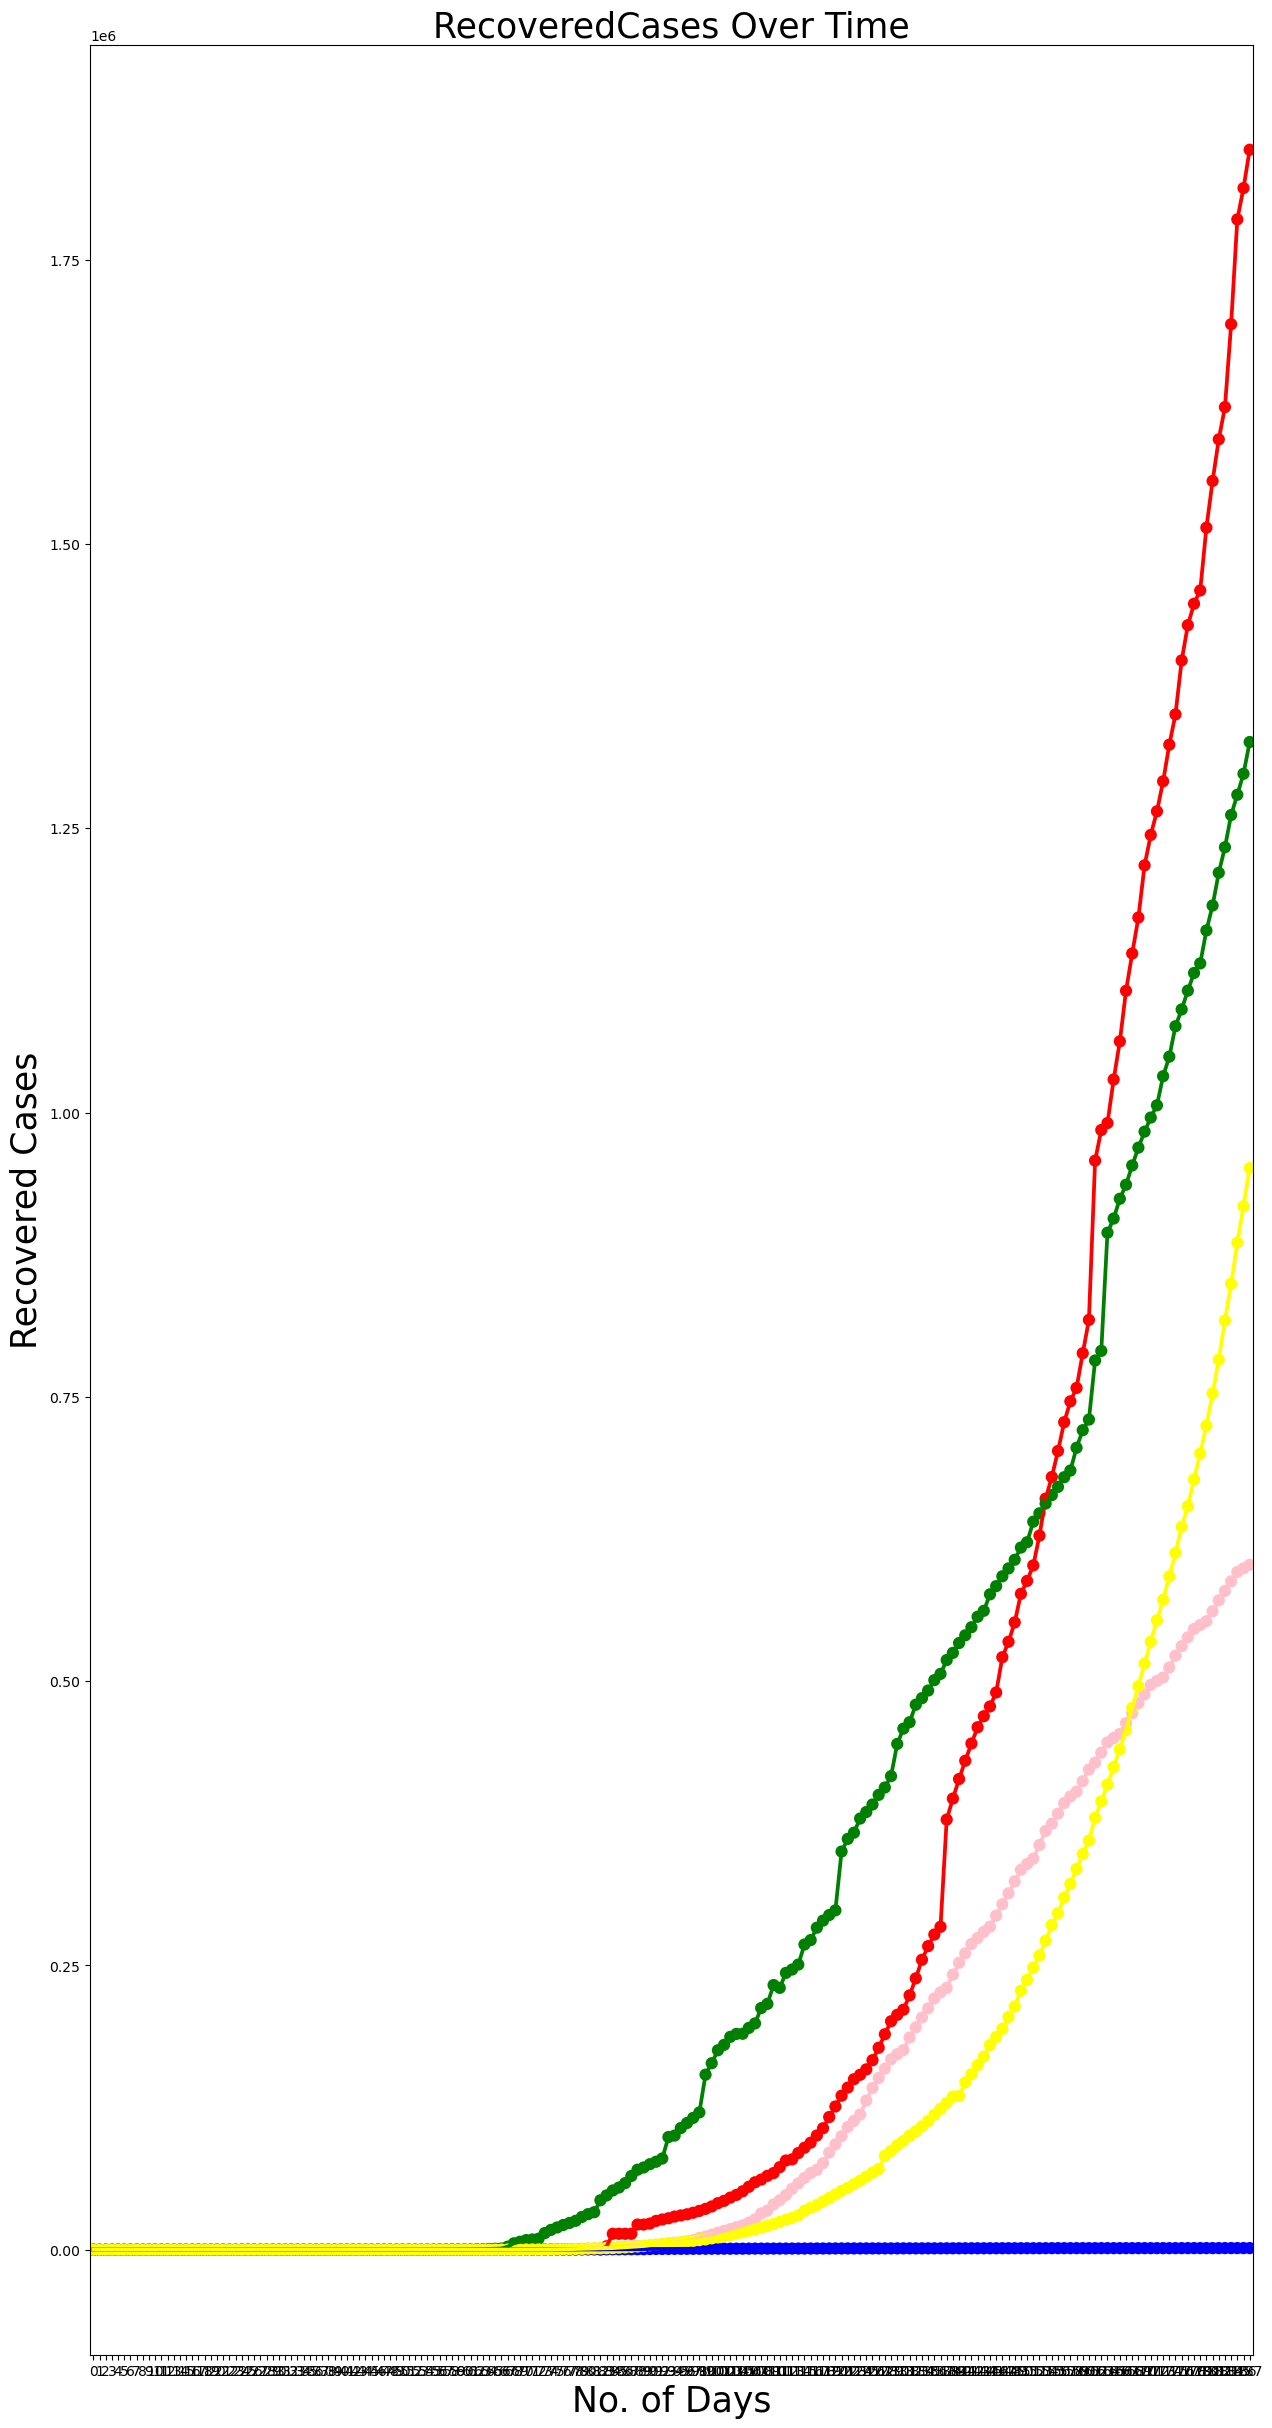

In [49]:
plt.figure(figsize=(15,30))
sns.pointplot(brazil.index,brazil.recovered,color="Red")
sns.pointplot(us.index,us.recovered,color="Green")
sns.pointplot(Russia.index,Russia.recovered,color="Pink")
sns.pointplot(uk.index,uk.recovered,color="Blue")
sns.pointplot(india.index,india.recovered,color="Yellow")

plt.title("RecoveredCases Over Time", fontsize=25)
plt.ylabel("Recovered Cases",fontsize=25)
plt.xlabel("No. of Days",fontsize=25)
plt.show()

In [50]:
pip install prophet

     ---------------------------------------- 12.9/12.9 MB 4.1 MB/s eta 0:00:00
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
     -------------------------------------- 642.9/642.9 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 83.2/83.2 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
from prophet import Prophet

In [52]:
import os
os

<module 'os' from 'C:\\Users\\DELL\\anaconda3\\lib\\os.py'>

In [53]:
data=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [54]:
data.head()

Province/State Country/Region       Lat       Long       Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953 2020-01-22          0   
1            NaN        Albania  41.15330  20.168300 2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600 2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800 2020-01-22          0   
4            NaN         Angola -11.20270  17.873900 2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [55]:
total_active=data['Active'].sum()
print('Total no.of active COVID 2019 CASES',total_active)

Total no.of active COVID 2019 CASES 396715350


In [56]:
data['Active']=data['Confirmed']-data['Deaths']-data['Recovered']

In [57]:
total_active=data['Active'].sum()
print('Total no.of detected COVID 2019 CASES',total_active)

Total no.of detected COVID 2019 CASES 396715350


In [58]:
Confirmed=data.groupby('Date').sum(['confirmed']).reset_index()
Deaths=data.groupby('Date').sum(['deaths']).reset_index()
Recovered=data.groupby('Date').sum(['recovered']).reset_index()
Confirmed.head()

Date         Lat         Long  Confirmed  Deaths  Recovered  Active
0 2020-01-22  5594.20365  6140.869714        555      17         28     510
1 2020-01-23  5594.20365  6140.869714        654      18         30     606
2 2020-01-24  5594.20365  6140.869714        941      26         36     879
3 2020-01-25  5594.20365  6140.869714       1434      42         39    1353
4 2020-01-26  5594.20365  6140.869714       2118      56         52    2010

In [59]:
confirmed = data.groupby('Date').sum()['Confirmed'].reset_index()
deaths = data.groupby('Date').sum()['Deaths'].reset_index()
confirmed.head()

Date  Confirmed
0 2020-01-22        555
1 2020-01-23        654
2 2020-01-24        941
3 2020-01-25       1434
4 2020-01-26       2118

In [63]:
confirmed.tail()

ds         y
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

In [60]:
# For building a forecasting model using fbProphet library,
# there should be only 2 columns passed
# The column names should always be --> 'ds','y'
confirmed.columns=['ds','y']
confirmed ['ds']=pd.to_datetime(confirmed['ds'])

In [61]:
confirmed

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
5   2020-01-27      2927
6   2020-01-28      5578
7   2020-01-29      6166
8   2020-01-30      8234
9   2020-01-31      9927
10  2020-02-01     12038
11  2020-02-02     16787
12  2020-02-03     19887
13  2020-02-04     23898
14  2020-02-05     27643
15  2020-02-06     30802
16  2020-02-07     34334
17  2020-02-08     37068
18  2020-02-09     40095
19  2020-02-10     42633
20  2020-02-11     44675
21  2020-02-12     46561
22  2020-02-13     60206
23  2020-02-14     66690
24  2020-02-15     68765
25  2020-02-16     70879
26  2020-02-17     72815
27  2020-02-18     74609
28  2020-02-19     75030
29  2020-02-20     75577
30  2020-02-21     76206
31  2020-02-22     77967
32  2020-02-23     78290
33  2020-02-24     78854
34  2020-02-25     79707
35  2020-02-26     80670
36  2020-02-27     82034
37  2020-02-28     83411
38  2020-02-29     85306
39  2020-03-01     87690
40  2020-03-02     89664
41  2020-03-03     92241
42  2020-03-04     94540
43  2020-03-05     97331
44  2020-03-06    101274
45  2020-03-07    105312
46  2020-03-08    109266
47  2020-03-09    113166
48  2020-03-10    118190
49  2020-03-11    125853
50  2020-03-12    131603
51  2020-03-13    146008
52  2020-03-14    157114
53  2020-03-15    168260
54  2020-03-16    182919
55  2020-03-17    198757
56  2020-03-18    218343
57  2020-03-19    246261
58  2020-03-20    275869
59  2020-03-21    308175
60  2020-03-22    341585
61  2020-03-23    383750
62  2020-03-24    424889
63  2020-03-25    475706
64  2020-03-26    538666
65  2020-03-27    603066
66  2020-03-28    670723
67  2020-03-29    730300
68  2020-03-30    794939
69  2020-03-31    871355
70  2020-04-01    947569
71  2020-04-02   1028968
72  2020-04-03   1112123
73  2020-04-04   1192586
74  2020-04-05   1264304
75  2020-04-06   1336976
76  2020-04-07   1413849
77  2020-04-08   1497624
78  2020-04-09   1584249
79  2020-04-10   1671907
80  2020-04-11   1748872
81  2020-04-12   1845653
82  2020-04-13   1915247
83  2020-04-14   1985174
84  2020-04-15   2066003
85  2020-04-16   2162715
86  2020-04-17   2250439
87  2020-04-18   2324396
88  2020-04-19   2404919
89  2020-04-20   2478258
90  2020-04-21   2553508
91  2020-04-22   2630314
92  2020-04-23   2719327
93  2020-04-24   2806267
94  2020-04-25   2891199
95  2020-04-26   2964146
96  2020-04-27   3032850
97  2020-04-28   3108149
98  2020-04-29   3185195
99  2020-04-30   3268876
100 2020-05-01   3355922
101 2020-05-02   3437608
102 2020-05-03   3515244
103 2020-05-04   3591321
104 2020-05-05   3671310
105 2020-05-06   3761332
106 2020-05-07   3850418
107 2020-05-08   3941935
108 2020-05-09   4027781
109 2020-05-10   4104027
110 2020-05-11   4180268
111 2020-05-12   4263867
112 2020-05-13   4348619
113 2020-05-14   4445724
114 2020-05-15   4542073
115 2020-05-16   4637485
116 2020-05-17   4715994
117 2020-05-18   4804278
118 2020-05-19   4900702
119 2020-05-20   5003730
120 2020-05-21   5110064
121 2020-05-22   5216964
122 2020-05-23   5322253
123 2020-05-24   5417579
124 2020-05-25   5504542
125 2020-05-26   5597064
126 2020-05-27   5699664
127 2020-05-28   5818978
128 2020-05-29   5940145
129 2020-05-30   6077978
130 2020-05-31   6185530
131 2020-06-01   6280725
132 2020-06-02   6401536
133 2020-06-03   6520924
134 2020-06-04   6647861
135 2020-06-05   6778724
136 2020-06-06   6914666
137 2020-06-07   7026925
138 2020-06-08   7129150
139 2020-06-09   7253492
140 2020-06-10   7387517
141 2020-06-11   7525631
142 2020-06-12   7654725
143 2020-06-13   7790735
144 2020-06-14   7924156
145 2020-06-15   8043794
146 2020-06-16   8185197
147 2020-06-17   8327050
148 2020-06-18   8466978
149 2020-06-19   8647784
150 2020-06-20   8805336
151 2020-06-21   8933875
152 2020-06-22   9071733
153 2020-06-23   9237071
154 2020-06-24   9408254
155 2020-06-25   9586141
156 2020-06-26   9777487
157 2020-06-27   9955597
158 2020-06-28  10117227
159 2020-06-

In [64]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail(7)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

07:52:59 - cmdstanpy - INFO - Chain [1] start processing
07:52:59 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [65]:
forecast = m.predict(future)
forecast.tail(7)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
190 2020-07-30  1.674387e+07  1.657251e+07  1.690931e+07
191 2020-07-31  1.695904e+07  1.679048e+07  1.713288e+07
192 2020-08-01  1.716673e+07  1.700030e+07  1.733549e+07
193 2020-08-02  1.736428e+07  1.718282e+07  1.753964e+07
194 2020-08-03  1.755891e+07  1.736964e+07  1.774748e+07

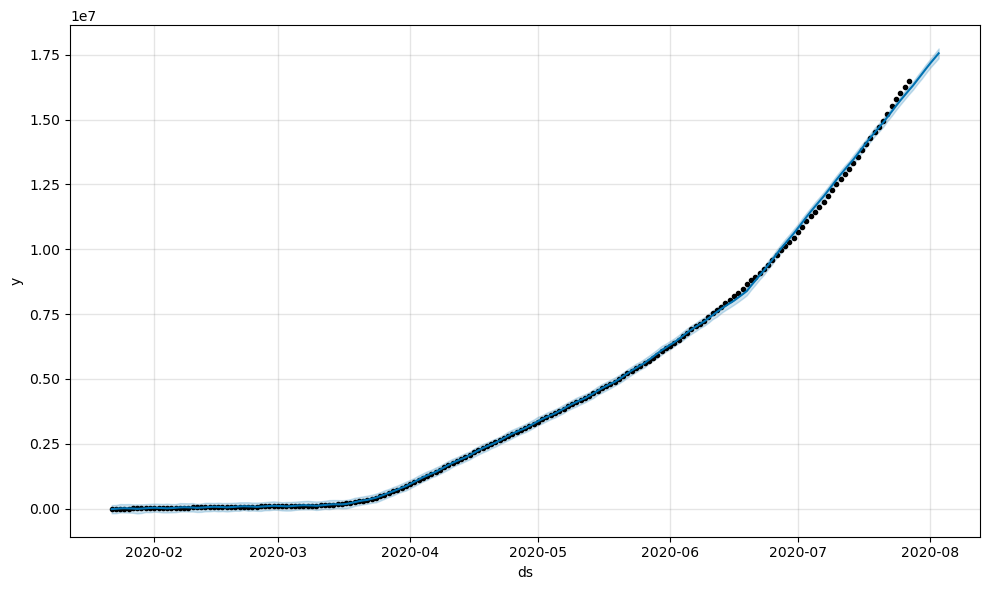

In [67]:
confirmed_forecast_plot = m.plot(forecast)

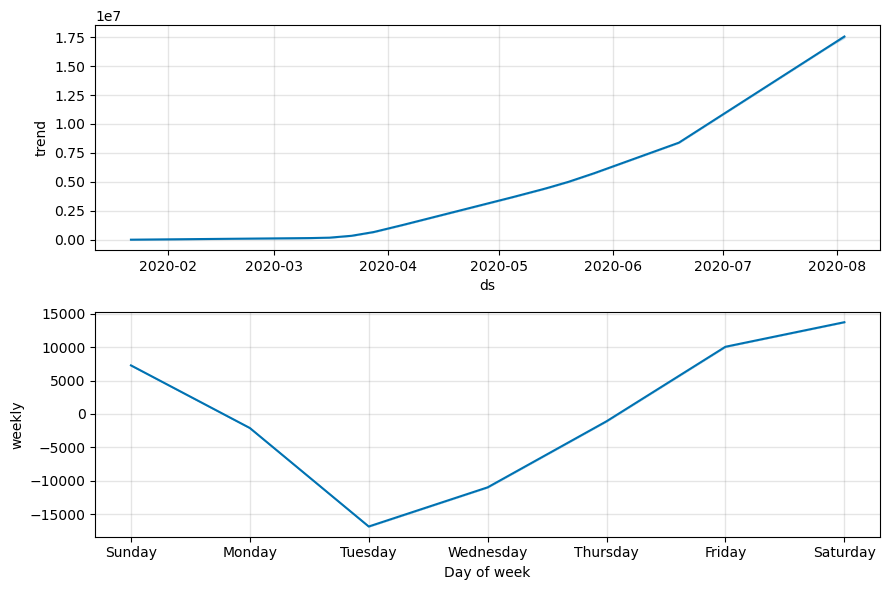

In [68]:
confirmed_forecast_plot1 = m.plot_components(forecast)

In [69]:
Recovered=data.groupby('Date').sum(['recovered']).reset_index()

In [70]:
recovered = data.groupby('Date').sum()['Recovered'].reset_index()

In [72]:
recovered

Date  Recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
5   2020-01-27         61
6   2020-01-28        107
7   2020-01-29        125
8   2020-01-30        141
9   2020-01-31        219
10  2020-02-01        281
11  2020-02-02        459
12  2020-02-03        604
13  2020-02-04        821
14  2020-02-05       1071
15  2020-02-06       1418
16  2020-02-07       1903
17  2020-02-08       2470
18  2020-02-09       3057
19  2020-02-10       3714
20  2020-02-11       4417
21  2020-02-12       4849
22  2020-02-13       5930
23  2020-02-14       7613
24  2020-02-15       8902
25  2020-02-16      10319
26  2020-02-17      11951
27  2020-02-18      13693
28  2020-02-19      15394
29  2020-02-20      17369
30  2020-02-21      17966
31  2020-02-22      21849
32  2020-02-23      22304
33  2020-02-24      24047
34  2020-02-25      26652
35  2020-02-26      29077
36  2020-02-27      31919
37  2020-02-28      35306
38  2020-02-29      38314
39  2020-03-01      41208
40  2020-03-02      44085
41  2020-03-03      46681
42  2020-03-04      49619
43  2020-03-05      52237
44  2020-03-06      54270
45  2020-03-07      56760
46  2020-03-08      59092
47  2020-03-09      60891
48  2020-03-10      62802
49  2020-03-11      65113
50  2020-03-12      66434
51  2020-03-13      68359
52  2020-03-14      70729
53  2020-03-15      74139
54  2020-03-16      76192
55  2020-03-17      78944
56  2020-03-18      81427
57  2020-03-19      83064
58  2020-03-20      85509
59  2020-03-21      89775
60  2020-03-22      95990
61  2020-03-23      96456
62  2020-03-24     105997
63  2020-03-25     111445
64  2020-03-26     119804
65  2020-03-27     128508
66  2020-03-28     136800
67  2020-03-29     146261
68  2020-03-30     161707
69  2020-03-31     174074
70  2020-04-01     189434
71  2020-04-02     206052
72  2020-04-03     221060
73  2020-04-04     241072
74  2020-04-05     254477
75  2020-04-06     270812
76  2020-04-07     293665
77  2020-04-08     322017
78  2020-04-09     346349
79  2020-04-10     367477
80  2020-04-11     392991
81  2020-04-12     411864
82  2020-04-13     438395
83  2020-04-14     463014
84  2020-04-15     498925
85  2020-04-16     529015
86  2020-04-17     554287
87  2020-04-18     577789
88  2020-04-19     608557
89  2020-04-20     629862
90  2020-04-21     664043
91  2020-04-22     693207
92  2020-04-23     721689
93  2020-04-24     771329
94  2020-04-25     798239
95  2020-04-26     825969
96  2020-04-27     852382
97  2020-04-28     884680
98  2020-04-29     925752
99  2020-04-30     989616
100 2020-05-01    1026501
101 2020-05-02    1066362
102 2020-05-03    1097577
103 2020-05-04    1130526
104 2020-05-05    1166155
105 2020-05-06    1210894
106 2020-05-07    1249311
107 2020-05-08    1284849
108 2020-05-09    1337367
109 2020-05-10    1370108
110 2020-05-11    1416204
111 2020-05-12    1452191
112 2020-05-13    1506905
113 2020-05-14    1545712
114 2020-05-15    1592880
115 2020-05-16    1648546
116 2020-05-17    1688699
117 2020-05-18    1740909
118 2020-05-19    1792256
119 2020-05-20    1850441
120 2020-05-21    1900768
121 2020-05-22    2008541
122 2020-05-23    2062802
123 2020-05-24    2117555
124 2020-05-25    2180605
125 2020-05-26    2235118
126 2020-05-27    2297613
127 2020-05-28    2363746
128 2020-05-29    2440127
129 2020-05-30    2509981
130 2020-05-31    2585589
131 2020-06-01    2639599
132 2020-06-02    2743083
133 2020-06-03    2821430
134 2020-06-04    2890776
135 2020-06-05    2959037
136 2020-06-06    3030214
137 2020-06-07    3084718
138 2020-06-08    3235640
139 2020-06-09    3317121
140 2020-06-10    3395154
141 2020-06-11    3480121
142 2020-06-12    3558933
143 2020-06-13    3644048
144 2020-06-14    3714006
145 2020-06-15    3793406
146 2020-06-16    3890800
147 2020-06-17    4008201
148 2020-06-18    4088826
149 2020-06-19    4183298
150 2020-06-20    4298603
151 2020-06-21    4366875
152 2020-06-22    4458093
153 20

In [73]:
recovered.columns=['ds','y']
recovered ['ds']=pd.to_datetime(recovered['ds'])

In [74]:
recovered

ds        y
0   2020-01-22       28
1   2020-01-23       30
2   2020-01-24       36
3   2020-01-25       39
4   2020-01-26       52
5   2020-01-27       61
6   2020-01-28      107
7   2020-01-29      125
8   2020-01-30      141
9   2020-01-31      219
10  2020-02-01      281
11  2020-02-02      459
12  2020-02-03      604
13  2020-02-04      821
14  2020-02-05     1071
15  2020-02-06     1418
16  2020-02-07     1903
17  2020-02-08     2470
18  2020-02-09     3057
19  2020-02-10     3714
20  2020-02-11     4417
21  2020-02-12     4849
22  2020-02-13     5930
23  2020-02-14     7613
24  2020-02-15     8902
25  2020-02-16    10319
26  2020-02-17    11951
27  2020-02-18    13693
28  2020-02-19    15394
29  2020-02-20    17369
30  2020-02-21    17966
31  2020-02-22    21849
32  2020-02-23    22304
33  2020-02-24    24047
34  2020-02-25    26652
35  2020-02-26    29077
36  2020-02-27    31919
37  2020-02-28    35306
38  2020-02-29    38314
39  2020-03-01    41208
40  2020-03-02    44085
41  2020-03-03    46681
42  2020-03-04    49619
43  2020-03-05    52237
44  2020-03-06    54270
45  2020-03-07    56760
46  2020-03-08    59092
47  2020-03-09    60891
48  2020-03-10    62802
49  2020-03-11    65113
50  2020-03-12    66434
51  2020-03-13    68359
52  2020-03-14    70729
53  2020-03-15    74139
54  2020-03-16    76192
55  2020-03-17    78944
56  2020-03-18    81427
57  2020-03-19    83064
58  2020-03-20    85509
59  2020-03-21    89775
60  2020-03-22    95990
61  2020-03-23    96456
62  2020-03-24   105997
63  2020-03-25   111445
64  2020-03-26   119804
65  2020-03-27   128508
66  2020-03-28   136800
67  2020-03-29   146261
68  2020-03-30   161707
69  2020-03-31   174074
70  2020-04-01   189434
71  2020-04-02   206052
72  2020-04-03   221060
73  2020-04-04   241072
74  2020-04-05   254477
75  2020-04-06   270812
76  2020-04-07   293665
77  2020-04-08   322017
78  2020-04-09   346349
79  2020-04-10   367477
80  2020-04-11   392991
81  2020-04-12   411864
82  2020-04-13   438395
83  2020-04-14   463014
84  2020-04-15   498925
85  2020-04-16   529015
86  2020-04-17   554287
87  2020-04-18   577789
88  2020-04-19   608557
89  2020-04-20   629862
90  2020-04-21   664043
91  2020-04-22   693207
92  2020-04-23   721689
93  2020-04-24   771329
94  2020-04-25   798239
95  2020-04-26   825969
96  2020-04-27   852382
97  2020-04-28   884680
98  2020-04-29   925752
99  2020-04-30   989616
100 2020-05-01  1026501
101 2020-05-02  1066362
102 2020-05-03  1097577
103 2020-05-04  1130526
104 2020-05-05  1166155
105 2020-05-06  1210894
106 2020-05-07  1249311
107 2020-05-08  1284849
108 2020-05-09  1337367
109 2020-05-10  1370108
110 2020-05-11  1416204
111 2020-05-12  1452191
112 2020-05-13  1506905
113 2020-05-14  1545712
114 2020-05-15  1592880
115 2020-05-16  1648546
116 2020-05-17  1688699
117 2020-05-18  1740909
118 2020-05-19  1792256
119 2020-05-20  1850441
120 2020-05-21  1900768
121 2020-05-22  2008541
122 2020-05-23  2062802
123 2020-05-24  2117555
124 2020-05-25  2180605
125 2020-05-26  2235118
126 2020-05-27  2297613
127 2020-05-28  2363746
128 2020-05-29  2440127
129 2020-05-30  2509981
130 2020-05-31  2585589
131 2020-06-01  2639599
132 2020-06-02  2743083
133 2020-06-03  2821430
134 2020-06-04  2890776
135 2020-06-05  2959037
136 2020-06-06  3030214
137 2020-06-07  3084718
138 2020-06-08  3235640
139 2020-06-09  3317121
140 2020-06-10  3395154
141 2020-06-11  3480121
142 2020-06-12  3558933
143 2020-06-13  3644048
144 2020-06-14  3714006
145 2020-06-15  3793406
146 2020-06-16  3890800
147 2020-06-17  4008201
148 2020-06-18  4088826
149 2020-06-19  4183298
150 2020-06-20  4298603
151 2020-06-21  4366875
152 2020-06-22  4458093
153 2020-06-23  4561696
154 2020-06-24  4677005
155 2020-06-25  4769458
156 2020-06-26  4875774
157 2020-06-27  4981808
158 2020-06-28  5070592
159 2020-06-29  5164494
160 2020-06-30  5281459
161 2020-07-01  5397083
162 2020-07-02  5681477
163 2020-07-03  5790942
164 2020-07-04  5986375
165 2020-07-05  6105546
166 

In [75]:
m=Prophet(interval_width=0.95)
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail(7)

07:57:08 - cmdstanpy - INFO - Chain [1] start processing
07:57:09 - cmdstanpy - INFO - Chain [1] done processing


ds
188 2020-07-28
189 2020-07-29
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [76]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ds          yhat    yhat_lower    yhat_upper
188 2020-07-28  9.313566e+06  9.186326e+06  9.435635e+06
189 2020-07-29  9.455788e+06  9.327787e+06  9.581959e+06
190 2020-07-30  9.598587e+06  9.475513e+06  9.716999e+06
191 2020-07-31  9.740132e+06  9.627531e+06  9.863156e+06
192 2020-08-01  9.880459e+06  9.759973e+06  9.998590e+06
193 2020-08-02  1.000651e+07  9.879963e+06  1.014420e+07
194 2020-08-03  1.014307e+07  1.001155e+07  1.028213e+07

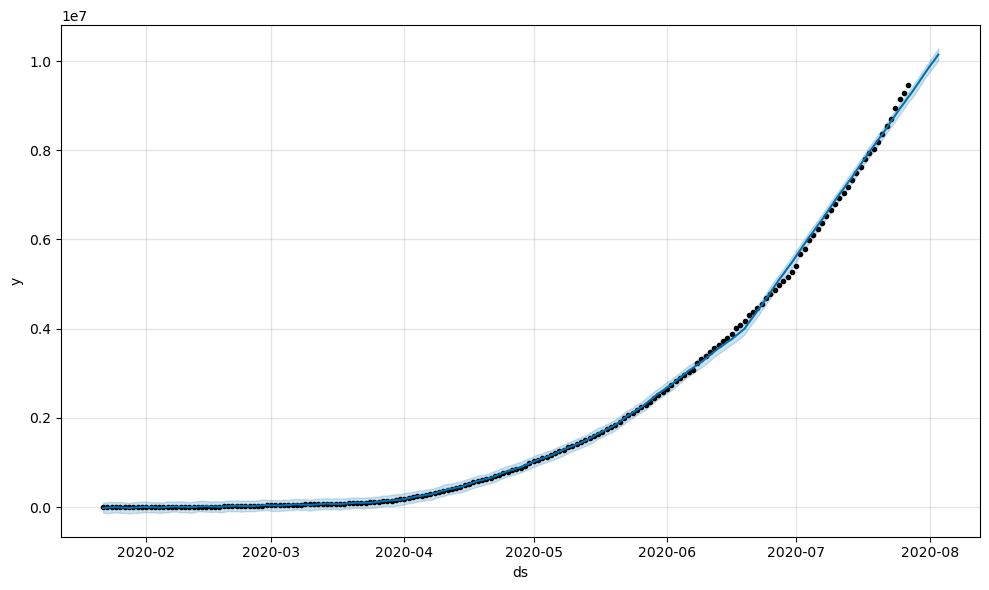

In [78]:
recovered_forecast_plot = m.plot(forecast)

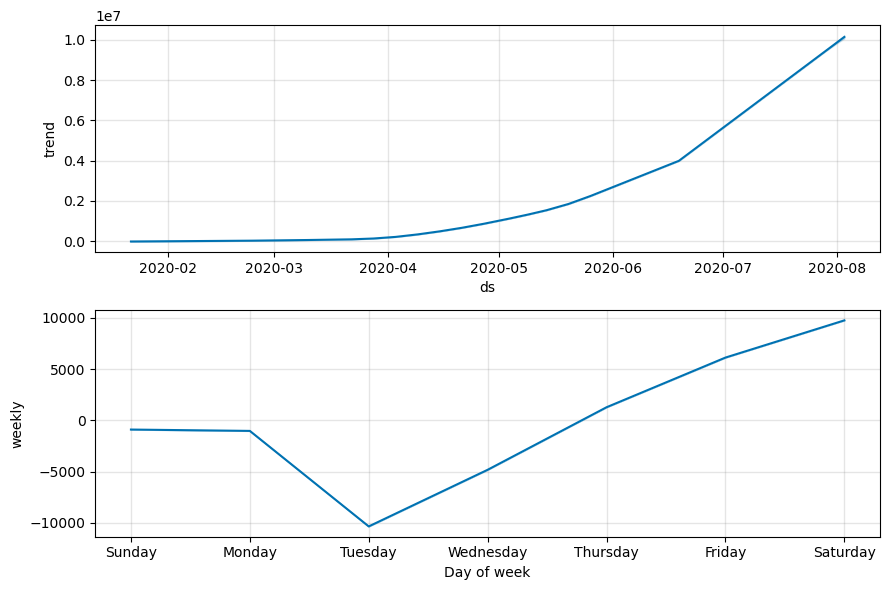

In [79]:
recovered_forecast_plot = m.plot_components(forecast)

In [80]:
Deaths=data.groupby('Date').sum(['Deaths']).reset_index()

In [81]:
deaths = data.groupby('Date').sum()['Deaths'].reset_index()

In [82]:
deaths

Date  Deaths
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
5   2020-01-27      82
6   2020-01-28     131
7   2020-01-29     133
8   2020-01-30     171
9   2020-01-31     213
10  2020-02-01     259
11  2020-02-02     362
12  2020-02-03     426
13  2020-02-04     492
14  2020-02-05     564
15  2020-02-06     634
16  2020-02-07     719
17  2020-02-08     806
18  2020-02-09     906
19  2020-02-10    1013
20  2020-02-11    1113
21  2020-02-12    1118
22  2020-02-13    1371
23  2020-02-14    1523
24  2020-02-15    1666
25  2020-02-16    1770
26  2020-02-17    1868
27  2020-02-18    2008
28  2020-02-19    2123
29  2020-02-20    2246
30  2020-02-21    2250
31  2020-02-22    2457
32  2020-02-23    2467
33  2020-02-24    2627
34  2020-02-25    2707
35  2020-02-26    2767
36  2020-02-27    2810
37  2020-02-28    2867
38  2020-02-29    2936
39  2020-03-01    2990
40  2020-03-02    3079
41  2020-03-03    3154
42  2020-03-04    3249
43  2020-03-05    3342
44  2020-03-06    3454
45  2020-03-07    3553
46  2020-03-08    3797
47  2020-03-09    3981
48  2020-03-10    4260
49  2020-03-11    4604
50  2020-03-12    4909
51  2020-03-13    5406
52  2020-03-14    5823
53  2020-03-15    6464
54  2020-03-16    7144
55  2020-03-17    7948
56  2020-03-18    8845
57  2020-03-19    9951
58  2020-03-20   11429
59  2020-03-21   13134
60  2020-03-22   14831
61  2020-03-23   16748
62  2020-03-24   19016
63  2020-03-25   21793
64  2020-03-26   24800
65  2020-03-27   28318
66  2020-03-28   31997
67  2020-03-29   35470
68  2020-03-30   39634
69  2020-03-31   44478
70  2020-04-01   50029
71  2020-04-02   56334
72  2020-04-03   62319
73  2020-04-04   68160
74  2020-04-05   73181
75  2020-04-06   79013
76  2020-04-07   86915
77  2020-04-08   93650
78  2020-04-09  101279
79  2020-04-10  108551
80  2020-04-11  114620
81  2020-04-12  120351
82  2020-04-13  126098
83  2020-04-14  132996
84  2020-04-15  141308
85  2020-04-16  148591
86  2020-04-17  157481
87  2020-04-18  163952
88  2020-04-19  168522
89  2020-04-20  173965
90  2020-04-21  181122
91  2020-04-22  187877
92  2020-04-23  194727
93  2020-04-24  201401
94  2020-04-25  206979
95  2020-04-26  210862
96  2020-04-27  215511
97  2020-04-28  221974
98  2020-04-29  228742
99  2020-04-30  234704
100 2020-05-01  239881
101 2020-05-02  245206
102 2020-05-03  248659
103 2020-05-04  252787
104 2020-05-05  258658
105 2020-05-06  265327
106 2020-05-07  270736
107 2020-05-08  276304
108 2020-05-09  280569
109 2020-05-10  284135
110 2020-05-11  287608
111 2020-05-12  293155
112 2020-05-13  298383
113 2020-05-14  303651
114 2020-05-15  308866
115 2020-05-16  313037
116 2020-05-17  316366
117 2020-05-18  319657
118 2020-05-19  324441
119 2020-05-20  329326
120 2020-05-21  334112
121 2020-05-22  339396
122 2020-05-23  343385
123 2020-05-24  346525
124 2020-05-25  347703
125 2020-05-26  351906
126 2020-05-27  357119
127 2020-05-28  361820
128 2020-05-29  366562
129 2020-05-30  370718
130 2020-05-31  373606
131 2020-06-01  376674
132 2020-06-02  381497
133 2020-06-03  387069
134 2020-06-04  392218
135 2020-06-05  396994
136 2020-06-06  400875
137 2020-06-07  403617
138 2020-06-08  407314
139 2020-06-09  412236
140 2020-06-10  417441
141 2020-06-11  422215
142 2020-06-12  426512
143 2020-06-13  430750
144 2020-06-14  434124
145 2020-06-15  437549
146 2020-06-16  444416
147 2020-06-17  449671
148 2020-06-18  454700
149 2020-06-19  460973
150 2020-06-20  465222
151 2020-06-21  469185
152 2020-06-22  472756
153 2020-06-23  478067
154 2020-06-24  483328
155 2020-06-25  489955
156 2020-06-26  494782
157 2020-06-27  499268
158 2020-06-28  502357
159 2020-06-29  506078
160 2020-06-30  511210
161 2020-07-01  516221
162 2020-07-02  521341
163 2020-07-03  526336
164 2020-07-04  530705
165 2020-07-05  534150
166 2020-07-06  537947
167 2020-07-07  544054
168 2020-07-08  549373
169 2020-07-09  554831
170 2020-07-10  560142
171 2020-07-11  565039
172 2020-07-12  568993
173 2020

In [83]:
deaths.columns=['ds','y']
deaths['ds']=pd.to_datetime(confirmed['ds'])

In [84]:
deaths

ds       y
0   2020-01-22      17
1   2020-01-23      18
2   2020-01-24      26
3   2020-01-25      42
4   2020-01-26      56
5   2020-01-27      82
6   2020-01-28     131
7   2020-01-29     133
8   2020-01-30     171
9   2020-01-31     213
10  2020-02-01     259
11  2020-02-02     362
12  2020-02-03     426
13  2020-02-04     492
14  2020-02-05     564
15  2020-02-06     634
16  2020-02-07     719
17  2020-02-08     806
18  2020-02-09     906
19  2020-02-10    1013
20  2020-02-11    1113
21  2020-02-12    1118
22  2020-02-13    1371
23  2020-02-14    1523
24  2020-02-15    1666
25  2020-02-16    1770
26  2020-02-17    1868
27  2020-02-18    2008
28  2020-02-19    2123
29  2020-02-20    2246
30  2020-02-21    2250
31  2020-02-22    2457
32  2020-02-23    2467
33  2020-02-24    2627
34  2020-02-25    2707
35  2020-02-26    2767
36  2020-02-27    2810
37  2020-02-28    2867
38  2020-02-29    2936
39  2020-03-01    2990
40  2020-03-02    3079
41  2020-03-03    3154
42  2020-03-04    3249
43  2020-03-05    3342
44  2020-03-06    3454
45  2020-03-07    3553
46  2020-03-08    3797
47  2020-03-09    3981
48  2020-03-10    4260
49  2020-03-11    4604
50  2020-03-12    4909
51  2020-03-13    5406
52  2020-03-14    5823
53  2020-03-15    6464
54  2020-03-16    7144
55  2020-03-17    7948
56  2020-03-18    8845
57  2020-03-19    9951
58  2020-03-20   11429
59  2020-03-21   13134
60  2020-03-22   14831
61  2020-03-23   16748
62  2020-03-24   19016
63  2020-03-25   21793
64  2020-03-26   24800
65  2020-03-27   28318
66  2020-03-28   31997
67  2020-03-29   35470
68  2020-03-30   39634
69  2020-03-31   44478
70  2020-04-01   50029
71  2020-04-02   56334
72  2020-04-03   62319
73  2020-04-04   68160
74  2020-04-05   73181
75  2020-04-06   79013
76  2020-04-07   86915
77  2020-04-08   93650
78  2020-04-09  101279
79  2020-04-10  108551
80  2020-04-11  114620
81  2020-04-12  120351
82  2020-04-13  126098
83  2020-04-14  132996
84  2020-04-15  141308
85  2020-04-16  148591
86  2020-04-17  157481
87  2020-04-18  163952
88  2020-04-19  168522
89  2020-04-20  173965
90  2020-04-21  181122
91  2020-04-22  187877
92  2020-04-23  194727
93  2020-04-24  201401
94  2020-04-25  206979
95  2020-04-26  210862
96  2020-04-27  215511
97  2020-04-28  221974
98  2020-04-29  228742
99  2020-04-30  234704
100 2020-05-01  239881
101 2020-05-02  245206
102 2020-05-03  248659
103 2020-05-04  252787
104 2020-05-05  258658
105 2020-05-06  265327
106 2020-05-07  270736
107 2020-05-08  276304
108 2020-05-09  280569
109 2020-05-10  284135
110 2020-05-11  287608
111 2020-05-12  293155
112 2020-05-13  298383
113 2020-05-14  303651
114 2020-05-15  308866
115 2020-05-16  313037
116 2020-05-17  316366
117 2020-05-18  319657
118 2020-05-19  324441
119 2020-05-20  329326
120 2020-05-21  334112
121 2020-05-22  339396
122 2020-05-23  343385
123 2020-05-24  346525
124 2020-05-25  347703
125 2020-05-26  351906
126 2020-05-27  357119
127 2020-05-28  361820
128 2020-05-29  366562
129 2020-05-30  370718
130 2020-05-31  373606
131 2020-06-01  376674
132 2020-06-02  381497
133 2020-06-03  387069
134 2020-06-04  392218
135 2020-06-05  396994
136 2020-06-06  400875
137 2020-06-07  403617
138 2020-06-08  407314
139 2020-06-09  412236
140 2020-06-10  417441
141 2020-06-11  422215
142 2020-06-12  426512
143 2020-06-13  430750
144 2020-06-14  434124
145 2020-06-15  437549
146 2020-06-16  444416
147 2020-06-17  449671
148 2020-06-18  454700
149 2020-06-19  460973
150 2020-06-20  465222
151 2020-06-21  469185
152 2020-06-22  472756
153 2020-06-23  478067
154 2020-06-24  483328
155 2020-06-25  489955
156 2020-06-26  494782
157 2020-06-27  499268
158 2020-06-28  502357
159 2020-06-29  506078
160 2020-06-30  511210
161 2020-07-01  516221
162 2020-07-02  521341
163 2020-07-03  526336
164 2020-07-04  530705
165 2020-07-05  534150
166 2020-07-06  537947
167 2020-07-07  544054
168 2020-07-08  549373
169 2020-07-09  554831
170 2020-07-10  560142
171 2020-07-11  565039
172 2020-07-12  568993
173 2020-0

In [85]:
m=Prophet(interval_width=0.95)
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

07:59:42 - cmdstanpy - INFO - Chain [1] start processing
07:59:42 - cmdstanpy - INFO - Chain [1] done processing


ds
190 2020-07-30
191 2020-07-31
192 2020-08-01
193 2020-08-02
194 2020-08-03

In [86]:
forecast = m.predict(future)
forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower     yhat_upper
190 2020-07-30  663507.435039  660260.404449  666731.206856
191 2020-07-31  669023.550937  665098.378752  672316.724950
192 2020-08-01  673906.664894  669841.530084  678089.150724
193 2020-08-02  678045.634959  673697.030845  682819.176753
194 2020-08-03  682335.151929  677056.569865  688057.673293

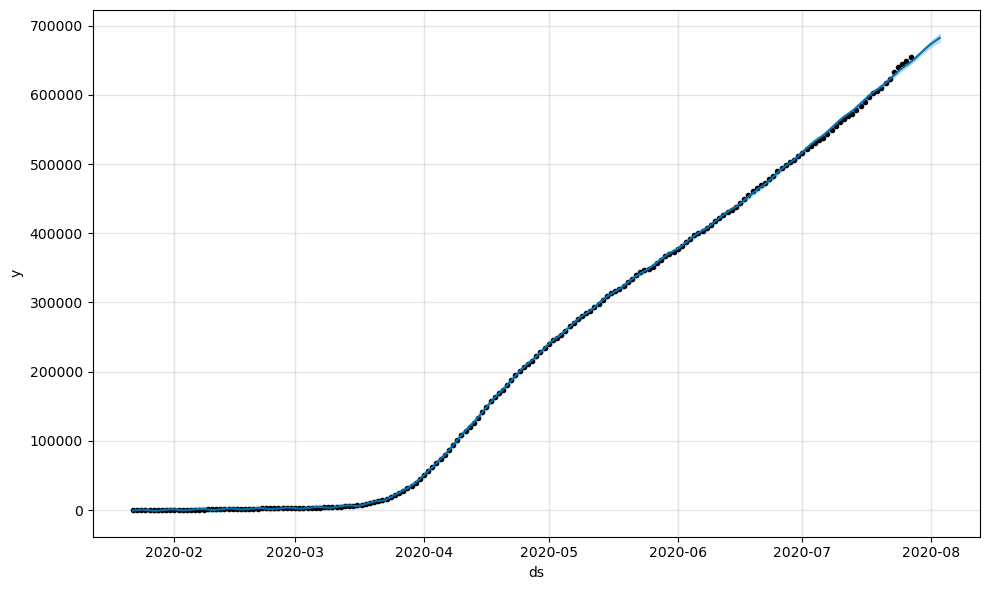

In [87]:
deaths_forecast_plot = m.plot(forecast)

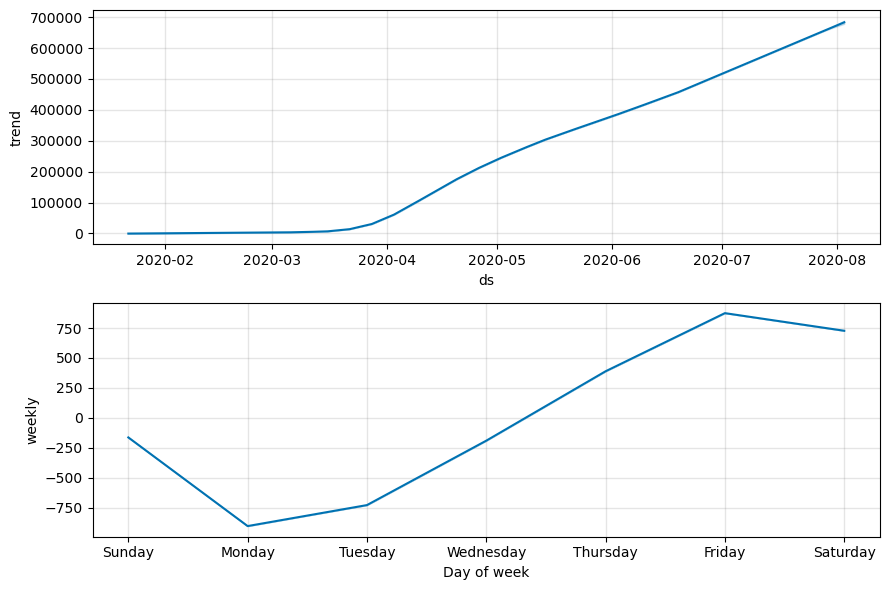

In [89]:
deaths_forecast_plot = m.plot_components(forecast)